## Data Preprocess

In [1]:
# Import the libraries
import os
import numpy as np 
import pandas as pd 
import c_visuals as vs
import matplotlib.pyplot as plt
import seaborn as sns  
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# Change working directory
os.chdir('C:/Users/User/Desktop/Data&Code/Wealth/Wealth_2019')

In [3]:
# Create Product_sub_Category 
def Product_sub_Category(df, col1, col2, value):
    list = []
    for i, j in zip(df[col1], df[col2]):
        if i == value:
            list.append(j)
        else:
            list.append(i)
    return list

In [4]:
# Import Data
Wealth = pd.read_excel('WEALTH_2019_20200331_v1.xlsx')

# Create Product_sub_Category 
Wealth['Product_sub_Category'] = Wealth['Product_Category'] + '_' + Wealth['Risk_Grade']
Wealth['Product_Variable'] = Product_sub_Category(Wealth, 'Product_Category', 'Product_sub_Category', '國內投信基金')

# Group by created variables
bins = [0, 20, 40, 50, 60, 70, 120]
labels = ['0-19', '20-39', '40-49', '50-59', '60-69','70+']
Wealth_flat = Wealth.groupby(['Customer_ID','Product_Variable'])['Buy_Amount'].sum().unstack()
Wealth_flat['Buy_Amount'] = Wealth.groupby(['Customer_ID'])['Buy_Amount'].sum()
Wealth_flat['Age'] = Wealth.groupby(['Customer_ID'])['Age'].first()
Wealth_flat['Gender'] = Wealth.groupby(['Customer_ID'])['Gender'].first()
Wealth_flat.fillna(value=1, inplace=True)

# Age bin
Wealth_flat['Age_bins'] = pd.cut(x=Wealth_flat['Age'], bins = bins, labels = labels,include_lowest = True)
Wealth_flat.head()

Product_Variable    債券附條件交易   國內投信基金_RR1  國內投信基金_RR2  國內投信基金_RR3  國內投信基金_RR4  \
Customer_ID                                                                    
22554052                1.0  200000000.0         1.0         1.0         1.0   
22973724          5100199.9          1.0         1.0         1.0         1.0   
23360414                1.0          1.0         1.0         1.0   2000000.0   
28160034                1.0          1.0         1.0         1.0         1.0   
54664285                1.0   12000000.0         1.0         1.0         1.0   

Product_Variable  國內投信基金_RR5    國內結構型商品  境外基金集保  外國債券   Buy_Amount  Age  \
Customer_ID                                                               
22554052                 1.0        1.0     1.0   1.0  200000000.0   33   
22973724                 1.0  1012000.0     1.0   1.0    6112199.9   32   
23360414                 1.0        1.0     1.0   1.0    2000000.0   31   
28160034             96000.0        1.0     1.0   1.0      96000.0   14   
54664285                 1.0        1.0     1.0   1.0   12000000.0    6   

Product_Variable Gender Age_bins  
Customer_ID                       
22554052          OTHER    20-39  
22973724          OTHER    20-39  
23360414          OTHER    20-39  
28160034          OTHER     0-19  
54664285          OTHER     0-19

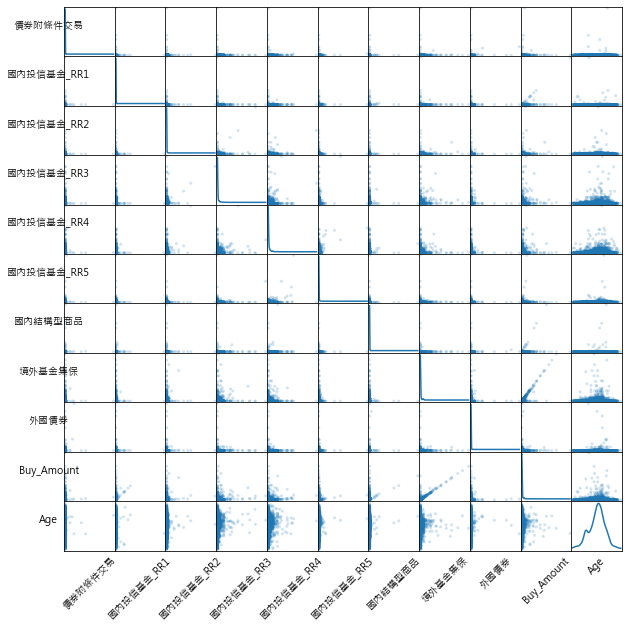

In [7]:
# Scatter_matrix plot of all features
wealth_flat_numeric = Wealth_flat.iloc[:,:-2]
sm = pd.plotting.scatter_matrix(wealth_flat_numeric, alpha=0.2, figsize=(10, 10), diagonal = 'kde')

# Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]

# Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

# plt.show()
plt.savefig('Wealth_2019_Var.png')

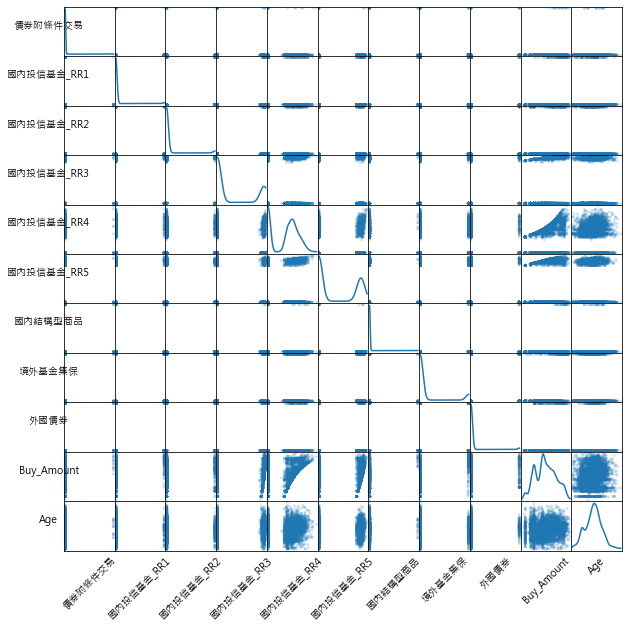

In [8]:
# Scale the data using the Box Cox method
from sklearn.preprocessing import PowerTransformer

bc = PowerTransformer(method='box-cox')
Wealth_scaled_features = bc.fit_transform(wealth_flat_numeric.values)
Wealth_scaled_features_df = pd.DataFrame(Wealth_scaled_features, index=wealth_flat_numeric.index,\
                                         columns=wealth_flat_numeric.columns)
sm = pd.plotting.scatter_matrix(Wealth_scaled_features_df, alpha=0.2, figsize=(10, 10), diagonal = 'kde')

# Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]

# Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

# plt.show()
plt.savefig('Wealth_2019_Var_Norm.png')

In [6]:
# Gender_df 
Gender_df = Wealth_flat.groupby('Gender').size().to_frame(name = 'Size')
Gender_df['Buy_Amount'] = Wealth_flat.groupby('Gender')['Buy_Amount'].sum()
Gender_df['Buy_Amount'] = Gender_df['Buy_Amount'].apply(lambda x: round(x, 0))
Gender_df

Size    Buy_Amount
Gender                    
FEMALE  3235  3.891022e+09
MALE    1979  2.788434e+09
OTHER      6  2.205682e+08

In [9]:
# Age df
Age_df = Wealth_flat.groupby('Age_bins').size().to_frame(name = 'Size')
Age_df['Buy_Amount'] = Wealth_flat.groupby('Age_bins')['Buy_Amount'].sum()
Age_df

Size    Buy_Amount
Age_bins                    
0-19       181  2.131764e+08
20-39     1184  1.211407e+09
40-49     1324  1.984798e+09
50-59     1485  2.317915e+09
60-69      780  9.192751e+08
70+        266  2.534519e+08

Text(0.5, 1.0, 'Wealth_2019_Age_distribution')

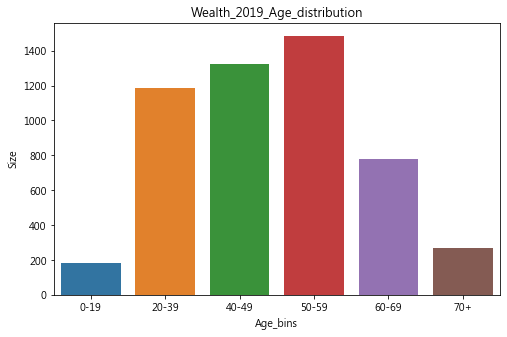

In [10]:
# Plot age distribution
plt.figure(figsize = (8,5))
sns.barplot(x = Age_df.index,y = Age_df['Size'])
plt.title('Wealth_2019_Age_distribution')

Text(0.5, 1.0, 'Wealth_2019_Age_buy_amount')

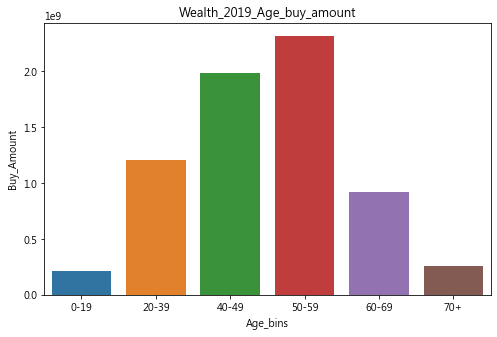

In [59]:
# Age_bin vs. Buy_amount barplot
plt.figure(figsize = (8,5))
sns.barplot(x = Age_df.index, y = Age_df.Buy_Amount)
plt.title('Wealth_2019_Age_buy_amount')

Text(0.5, 1.0, 'Wealth_2019_Age_Average_buy_amount')

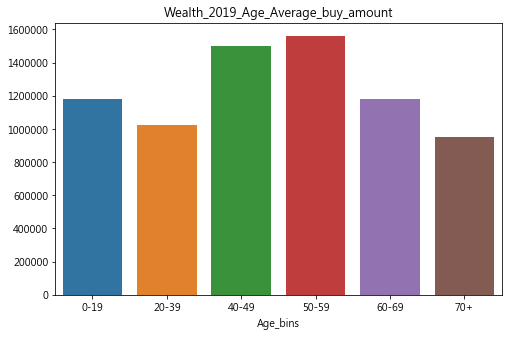

In [12]:
# Age_bin vs. Buy_amount barplot
plt.figure(figsize = (8,5))
sns.barplot(x = Age_df.index, y = Age_df.Buy_Amount / Age_df.Size)
plt.title('Wealth_2019_Age_Average_buy_amount')

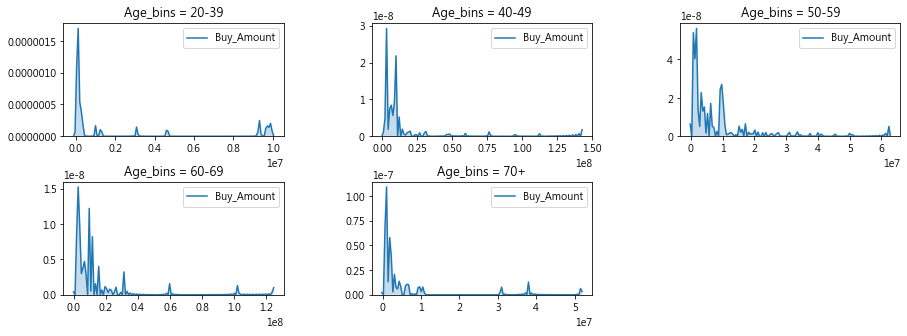

In [64]:
# Age bin kde plot
fig , ax = plt.subplots(figsize = (15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i,j in enumerate(np.sort(Wealth_flat.Age_bins.unique())):
    plt.subplot(2, 3, i+1)
    filter_ = Wealth_flat['Age_bins'] == j
    sns.kdeplot(Wealth_flat.loc[filter_].Buy_Amount, shade=True)
    plt.title("Age_bins = {}" .format(j))

## Outlier Detection

In [14]:
# Outlier detection
import xlsxwriter

# Create a new df with the descriptive features
Wealth_feat_w_prop_df = wealth_flat_numeric
Wealth_feat_w_prop_df['Customer_Name'] = Wealth.groupby(['Customer_ID'])['Customer_Name'].first()
Wealth_feat_w_prop_df['Age'] = Wealth.groupby(['Customer_ID'])['Age'].first()
Wealth_feat_w_prop_df['Gender'] = Wealth.groupby(['Customer_ID'])['Gender'].first()
Wealth_feat_w_prop_df['Constellation'] = Wealth.groupby(['Customer_ID'])['Constellation'].first()
Wealth_feat_w_prop_df['Buy_Amount'] = Wealth.groupby(['Customer_ID'])['Buy_Amount'].sum()
Wealth_feat_w_prop_df['Com_ID'] = Wealth.groupby(['Customer_ID'])['Com_ID'].first()
Wealth_feat_w_prop_df['Sales_ID'] = Wealth.groupby(['Customer_ID'])['Com_ID'].first()
Wealth_feat_w_prop_df['Sales_Name'] = Wealth.groupby(['Customer_ID'])['Com_ID'].first()

feature_outliers = []
writer = pd.ExcelWriter('Wealth_2019_Outliers_sheets.xlsx', engine='xlsxwriter')

for feature in Wealth_scaled_features_df.keys():
    Q1 = np.percentile(Wealth_scaled_features_df[feature], 25)
    Q3 = np.percentile(Wealth_scaled_features_df[feature], 75)
    step = 1.5*(Q3 - Q1)
    Outlier_Index = ~((Wealth_scaled_features_df[feature] >= Q1 - step)&\
                       (Wealth_scaled_features_df[feature] <= Q3 + step))
    Wealth_feat_w_prop_df.loc[Wealth_scaled_features_df.loc[Outlier_Index].index,:].groupby(['Customer_ID']).first()\
    .to_excel(writer, sheet_name = feature)
    feature_outliers.append(Wealth_feat_w_prop_df.loc[Wealth_scaled_features_df.loc[Outlier_Index].index,:])
writer.save()

# Flatten list of outliers
outliers_flattened = []

for i, j in enumerate(feature_outliers):
    outliers_flattened.append(feature_outliers[i].index)
flat_list = [item for sublist in outliers_flattened for item in sublist]

# Count the number of features for which a given observation is considered an outlier
from collections import Counter
outlier_count = Counter(flat_list)
outliers = [observation for observation in outlier_count.elements() if outlier_count[observation] >= 3]
Wealth_feat_w_prop_df.loc[Wealth_scaled_features_df.loc[outliers].index,:].groupby(['Customer_ID']).first()\
.to_csv('Wealth_2019_Outliers.csv', encoding='utf_8_sig')

## PCA vs. SVD

Explained Var  債券附條件交易  國內投信基金_RR1  國內投信基金_RR2  國內投信基金_RR3  \
Dim 1          0.1772   0.1211      0.2318      0.2022      0.3377   
Dim 2          0.1151   0.0561      0.0972      0.1549      0.2147   
Dim 3          0.1090   0.5565      0.2345     -0.2057     -0.2866   
Dim 4          0.0997   0.2052     -0.1875      0.3442      0.4516   
Dim 5          0.0958  -0.1702      0.4922      0.3595     -0.1645   
Dim 6          0.0879   0.3147     -0.4394      0.0334     -0.3100   
Dim 7          0.0814   0.3052     -0.2184      0.7303     -0.1767   
Dim 8          0.0796   0.4085     -0.2556     -0.3138      0.2461   
Dim 9          0.0733   0.4899      0.5394     -0.0689      0.0423   
Dim 10         0.0575  -0.0101      0.0358      0.0814     -0.5327   
Dim 11         0.0235   0.0466      0.0779      0.0266      0.2308   

        國內投信基金_RR4  國內投信基金_RR5  國內結構型商品  境外基金集保    外國債券  Buy_Amount     Age  
Dim 1       0.2023      0.0195   0.1403  0.5206  0.2178      0.6195  0.1158  
Dim 2      -0.7432      0.4795   0.0345  0.1530  0.1585     -0.1306 -0.2612  
Dim 3      -0.0246     -0.0301   0.6318 -0.1744  0.2716     -0.0641  0.0422  
Dim 4      -0.1443     -0.6654   0.0106 -0.1090  0.2462     -0.2484 -0.0500  
Dim 5       0.1286     -0.1904   0.1667 -0.0114 -0.2878     -0.0221 -0.6391  
Dim 6       0.2252      0.0915  -0.2888  0.1895  0.3577      0.0673 -0.5476  
Dim 7       0.0686      0.2801   0.0511 -0.1798 -0.3025      0.0408  0.2886  
Dim 8      -0.0970     -0.0866   0.1172  0.2129 -0.6946      0.0953 -0.2030  
Dim 9       0.0127     -0.0062  -0.6589 -0.1193 -0.0476     -0.0534  0.0933  
Dim 10     -0.3249     -0.3573  -0.0797  0.6100 -0.0781     -0.1464  0.2627  
Dim 11      0.4451      0.2603   0.1086  0.4041  0.0023     -0.7023  0.0596

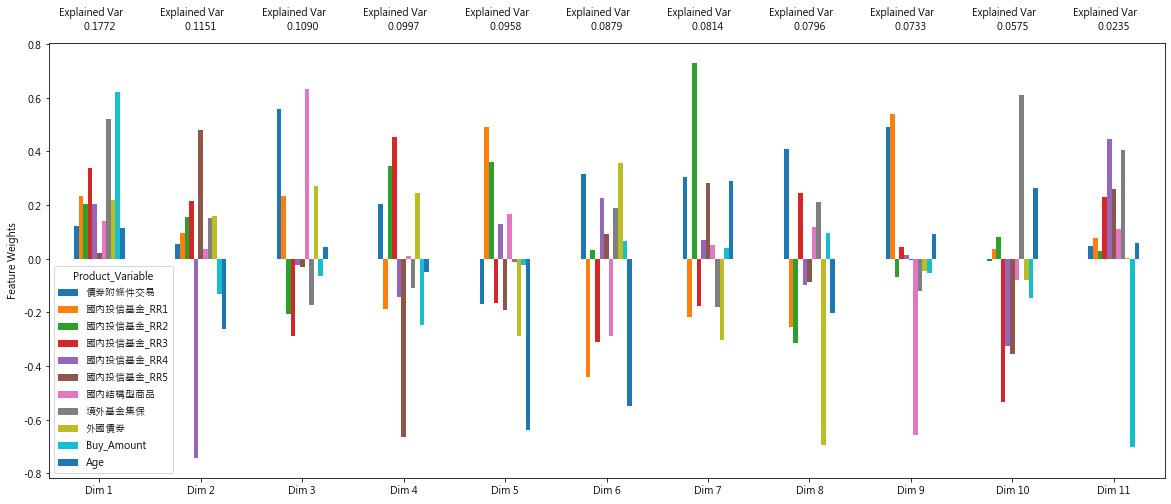

In [133]:
# PCA
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
num_features = Wealth_scaled_features_df.shape[1]
pca = PCA(n_components = num_features, random_state = 0)
pca = pca.fit(Wealth_scaled_features_df)

# Transform log_samples using the PCA fit above

# Generate PCA results plot
vs.pca_results(Wealth_scaled_features_df, pca)

Explained Var  債券附條件交易  國內投信基金_RR1  國內投信基金_RR2  國內投信基金_RR3  \
Dim 1          0.1772   0.1211      0.2318      0.2022      0.3377   
Dim 2          0.1151   0.0561      0.0972      0.1549      0.2147   
Dim 3          0.1090   0.5565      0.2345     -0.2057     -0.2866   
Dim 4          0.0997   0.2052     -0.1875      0.3442      0.4516   
Dim 5          0.0958  -0.1702      0.4922      0.3595     -0.1645   
Dim 6          0.0879   0.3147     -0.4394      0.0334     -0.3100   
Dim 7          0.0814   0.3052     -0.2184      0.7303     -0.1767   
Dim 8          0.0796   0.4085     -0.2556     -0.3138      0.2461   
Dim 9          0.0733   0.4899      0.5394     -0.0689      0.0423   
Dim 10         0.0575  -0.0101      0.0358      0.0814     -0.5327   

        國內投信基金_RR4  國內投信基金_RR5  國內結構型商品  境外基金集保    外國債券  Buy_Amount     Age  
Dim 1       0.2023      0.0195   0.1403  0.5206  0.2178      0.6195  0.1158  
Dim 2      -0.7432      0.4795   0.0345  0.1530  0.1585     -0.1306 -0.2612  
Dim 3      -0.0246     -0.0301   0.6318 -0.1744  0.2716     -0.0641  0.0422  
Dim 4      -0.1443     -0.6654   0.0106 -0.1090  0.2462     -0.2484 -0.0500  
Dim 5       0.1286     -0.1904   0.1667 -0.0114 -0.2878     -0.0221 -0.6391  
Dim 6       0.2252      0.0915  -0.2888  0.1895  0.3577      0.0673 -0.5476  
Dim 7       0.0686      0.2801   0.0511 -0.1798 -0.3025      0.0408  0.2886  
Dim 8      -0.0970     -0.0866   0.1172  0.2129 -0.6946      0.0953 -0.2030  
Dim 9       0.0127     -0.0062  -0.6589 -0.1193 -0.0476     -0.0534  0.0933  
Dim 10     -0.3249     -0.3573  -0.0797  0.6100 -0.0781     -0.1464  0.2627

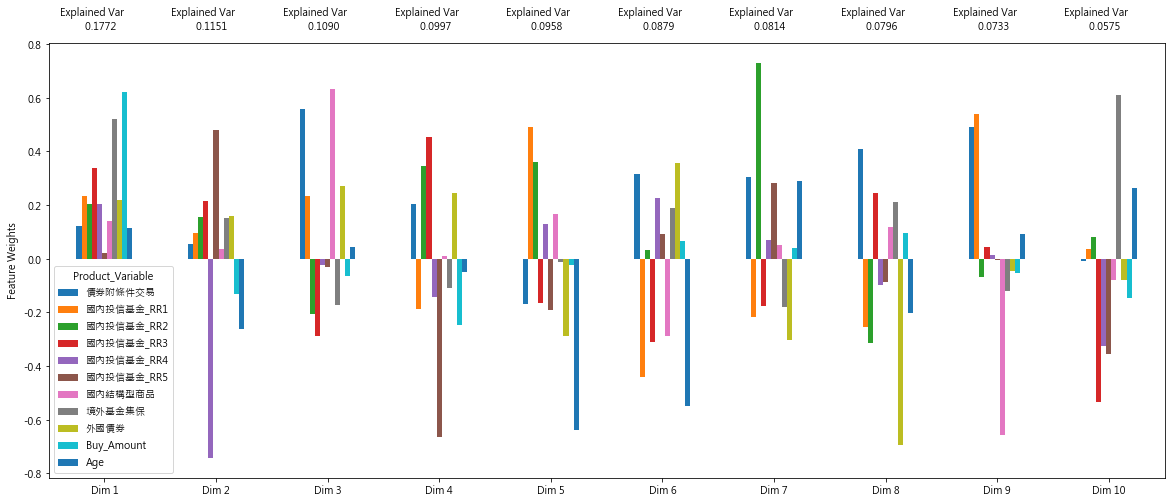

In [16]:
# SVD
from sklearn.decomposition import TruncatedSVD

# Apply PCA by fitting the good data with the same number of dimensions as features
num_features = Wealth_scaled_features_df.shape[1] - 1
svd = TruncatedSVD(n_components = num_features, random_state = 0)
svd = svd.fit(Wealth_scaled_features_df)

# Transform log_samples using the PCA fit above

# Generate PCA results plot
vs.pca_results(Wealth_scaled_features_df, svd)

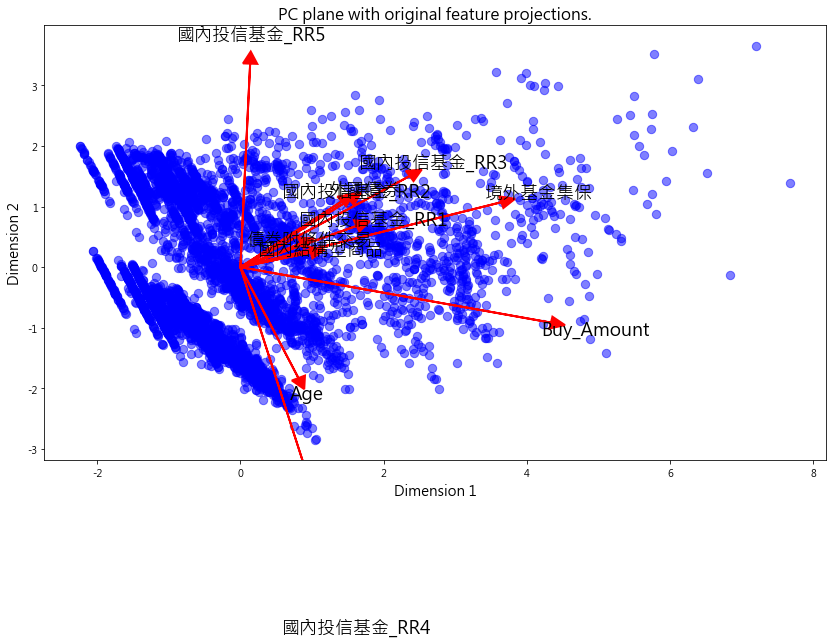

In [134]:
# Apply PCA by fitting data with only 2 Dimensions
pca = PCA(n_components = 2, random_state = 0)
pca = pca.fit(Wealth_scaled_features_df)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(Wealth_scaled_features_df)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

vs.biplot(Wealth_scaled_features_df ,reduced_data, pca)

## K means Clustering

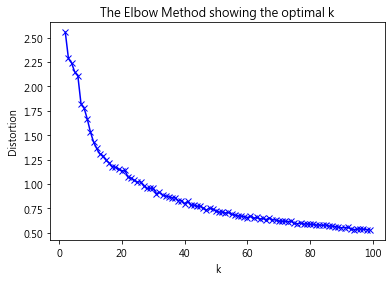

In [18]:
# clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

# k means determine k
distortions = []
K = range(2,100)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Wealth_scaled_features_df)
    distortions.append(sum(np.min(cdist(Wealth_scaled_features_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / \
                       Wealth_scaled_features_df.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

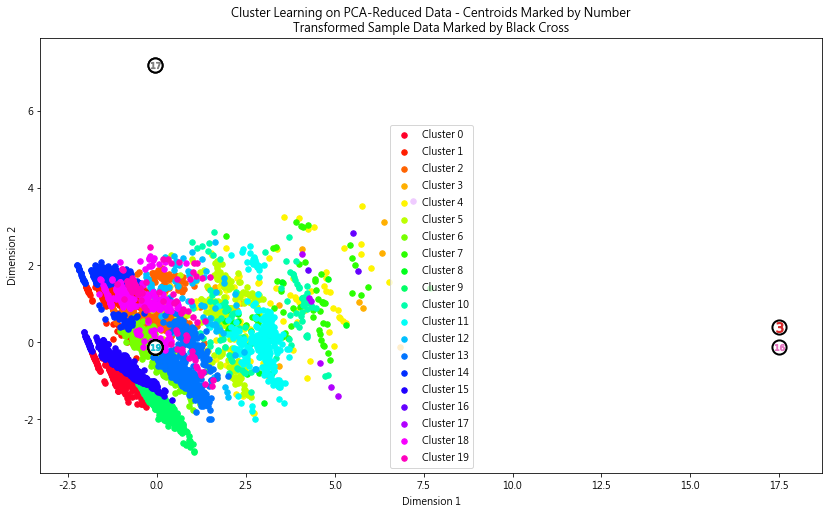

In [19]:
# Clustering(Elbow_method)
optimized_kmeans = KMeans(n_clusters = 20, random_state = 0).fit(Wealth_scaled_features_df)
kmeans_preds = optimized_kmeans.predict(Wealth_scaled_features_df)
kmeans_centers = optimized_kmeans.cluster_centers_
vs.cluster_results(reduced_data, kmeans_preds, kmeans_centers)

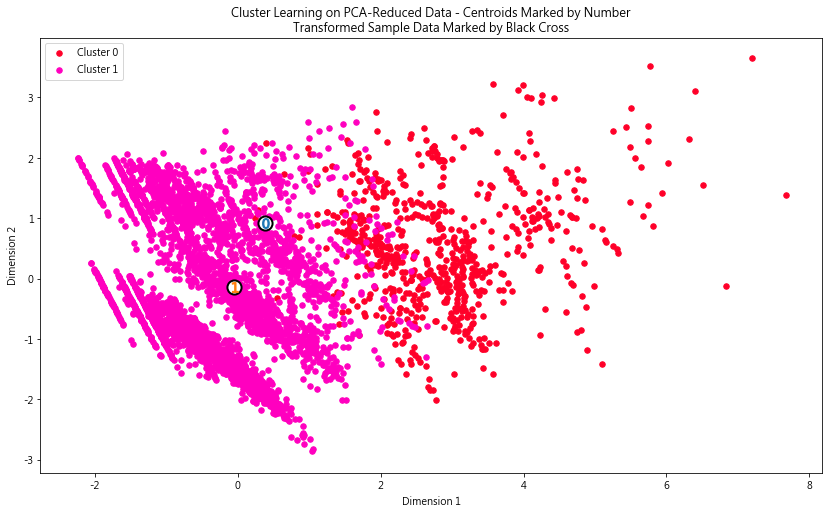

In [135]:
# Clustering(silhouette_score method)
# silhouette_score method
num_clusters = np.arange(2,30)
kmeans_results = {}
for size in num_clusters:
    kmeans = KMeans(n_clusters = size).fit(Wealth_scaled_features_df)
    preds = kmeans.predict(Wealth_scaled_features_df)
    kmeans_results[size] = metrics.silhouette_score(Wealth_scaled_features_df, preds)
    
best_size = max(kmeans_results, key = kmeans_results.get)

optimized_kmeans = KMeans(n_clusters = best_size, random_state = 0).fit(Wealth_scaled_features_df)
kmeans_preds = optimized_kmeans.predict(Wealth_scaled_features_df)
kmeans_centers = optimized_kmeans.cluster_centers_
vs.cluster_results(reduced_data, kmeans_preds, kmeans_centers)

For n_clusters = 2 The average silhouette_score is : 0.4439026742045887
For n_clusters = 3 The average silhouette_score is : 0.4213998625005165
For n_clusters = 4 The average silhouette_score is : 0.22318358807693747
For n_clusters = 5 The average silhouette_score is : 0.24587680537258821
For n_clusters = 6 The average silhouette_score is : 0.2932555557346508
For n_clusters = 7 The average silhouette_score is : 0.3271115491147024
For n_clusters = 8 The average silhouette_score is : 0.3351852449674984
For n_clusters = 9 The average silhouette_score is : 0.3613093099760738
For n_clusters = 10 The average silhouette_score is : 0.317617226560245
For n_clusters = 11 The average silhouette_score is : 0.3471866090019948
For n_clusters = 12 The average silhouette_score is : 0.36211005148349173
For n_clusters = 13 The average silhouette_score is : 0.35205704105917596
For n_clusters = 14 The average silhouette_score is : 0.34341986151759024
For n_clusters = 15 The average silhouette_score is : 0

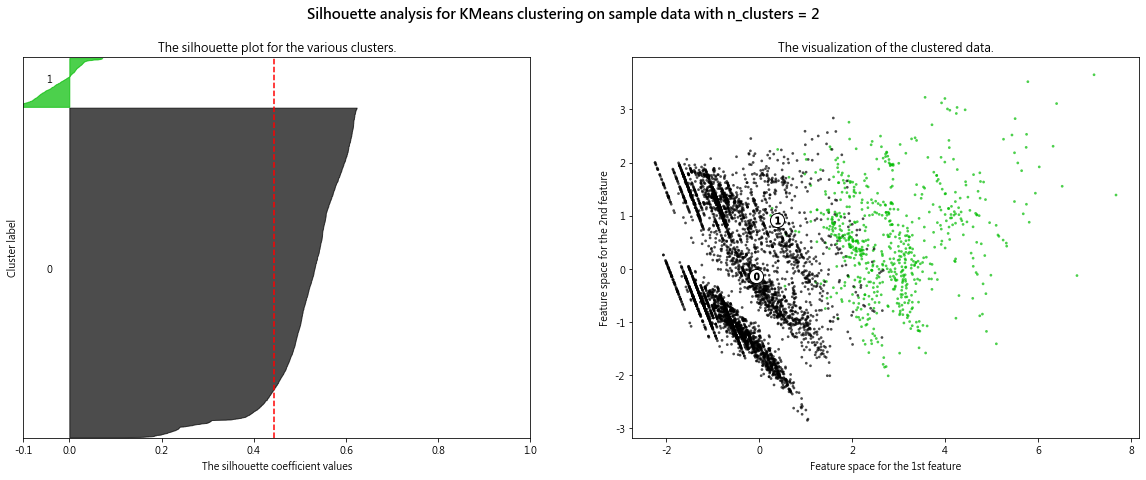

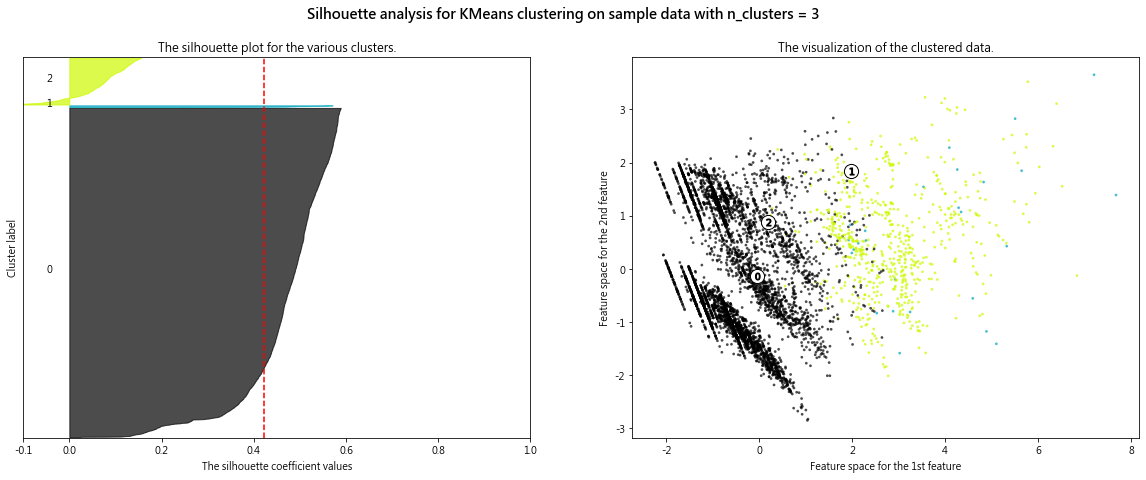

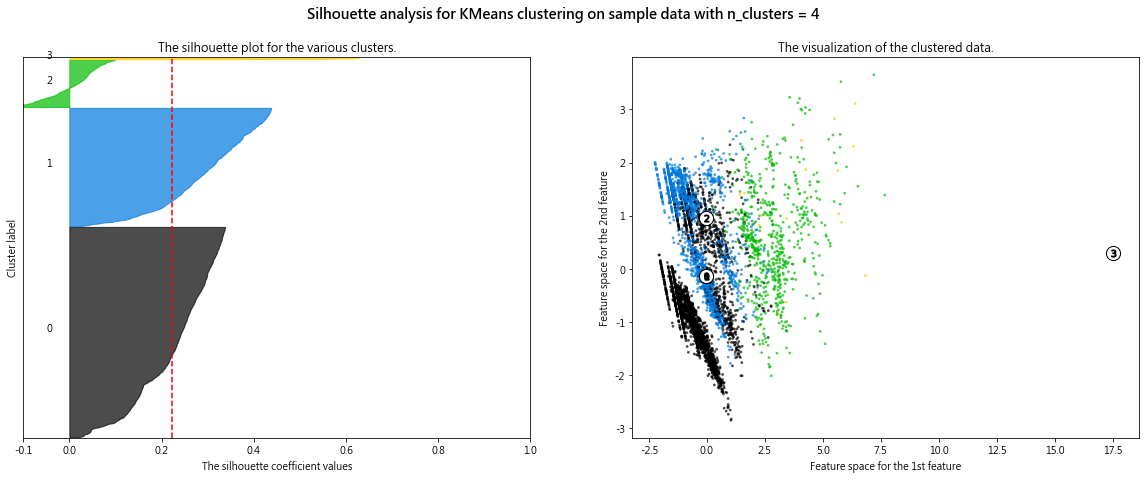

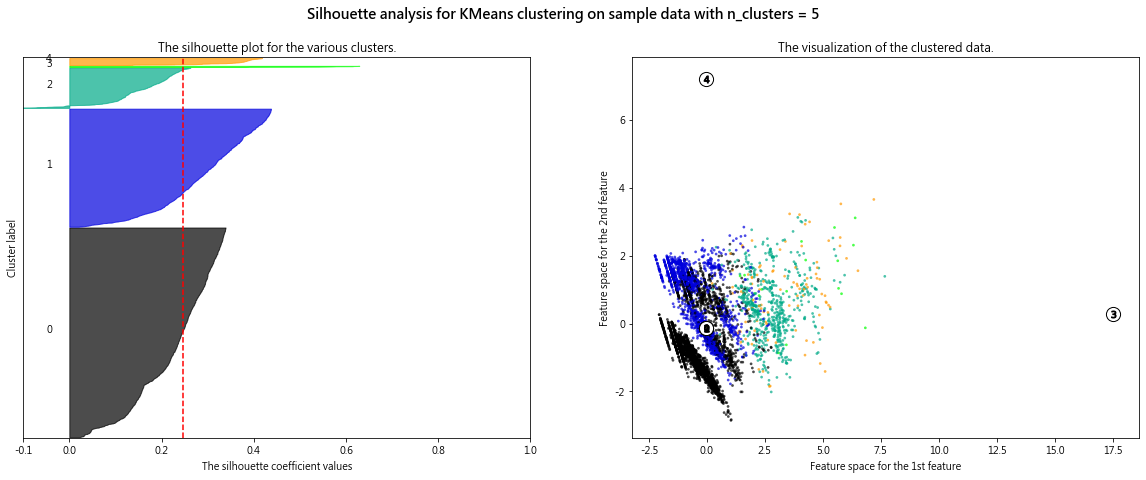

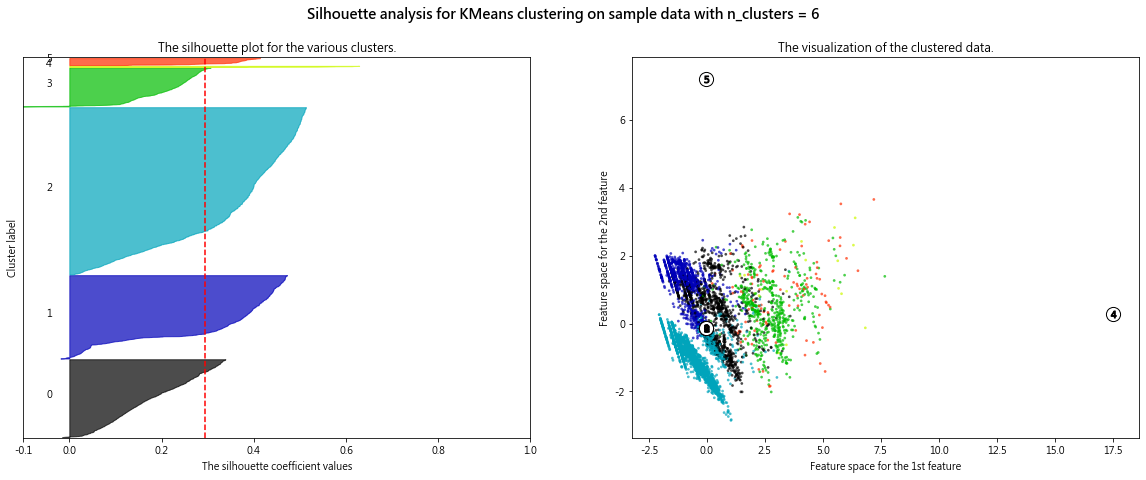

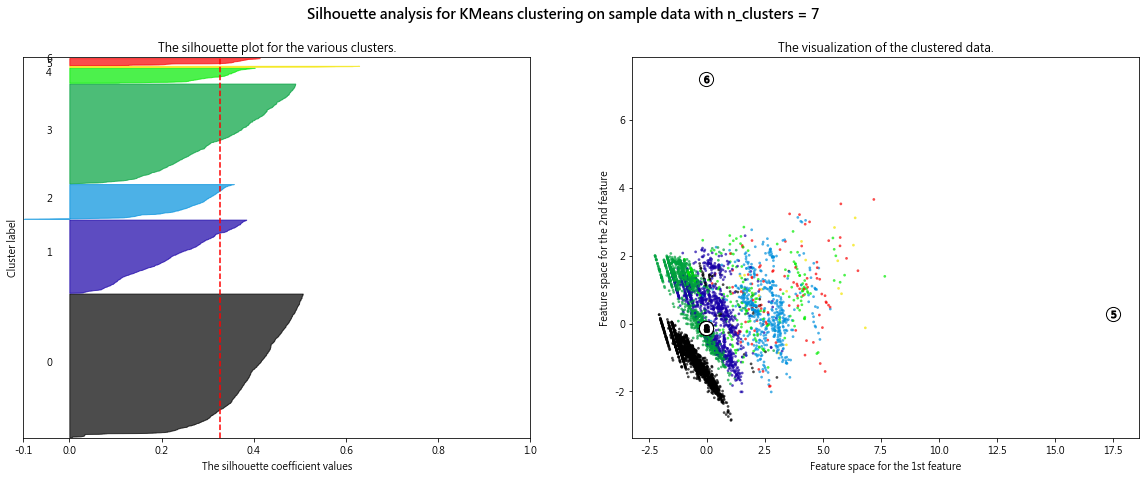

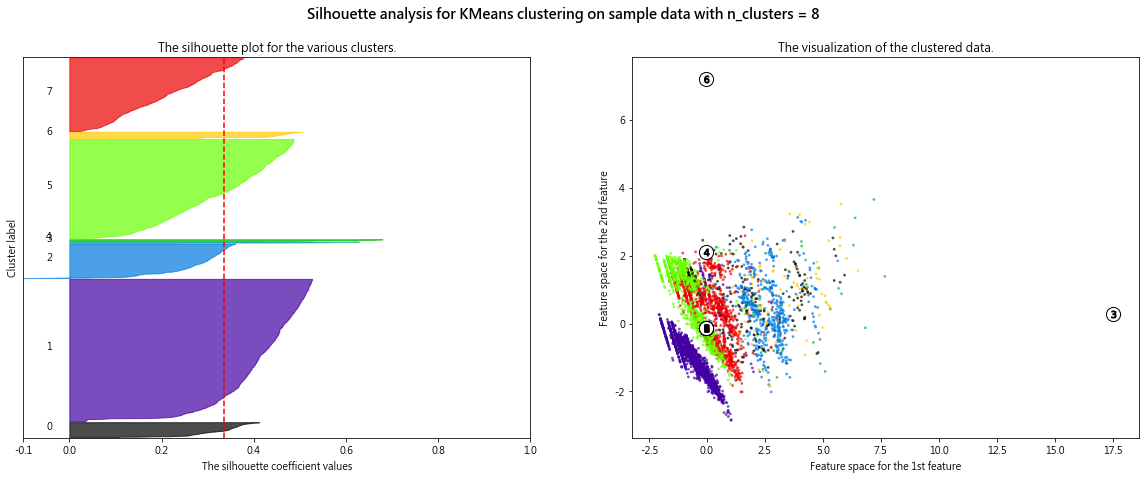

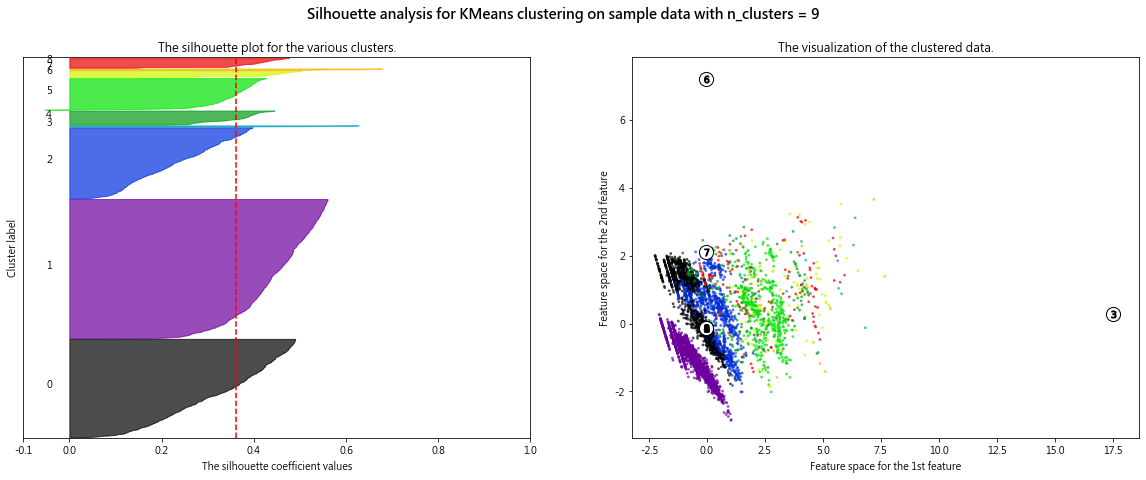

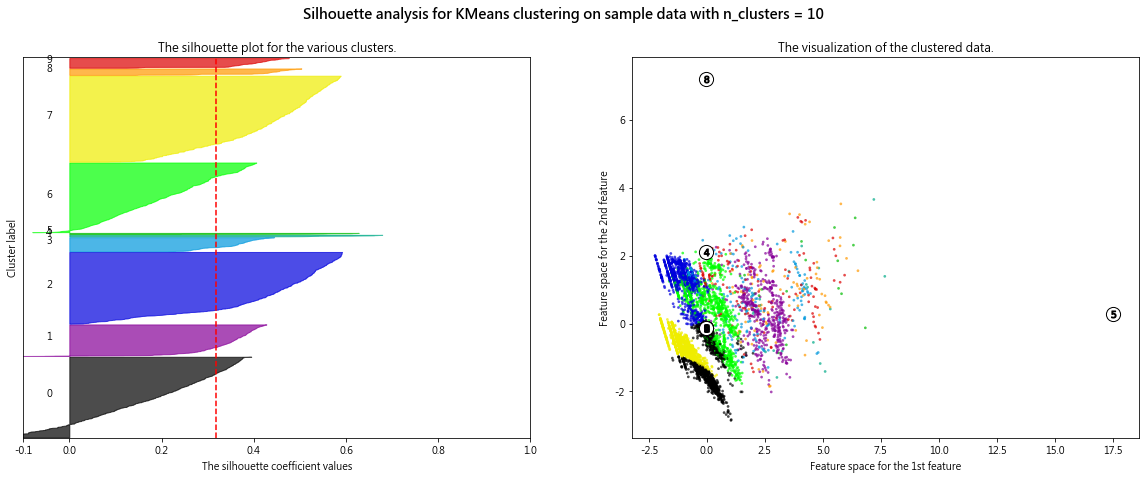

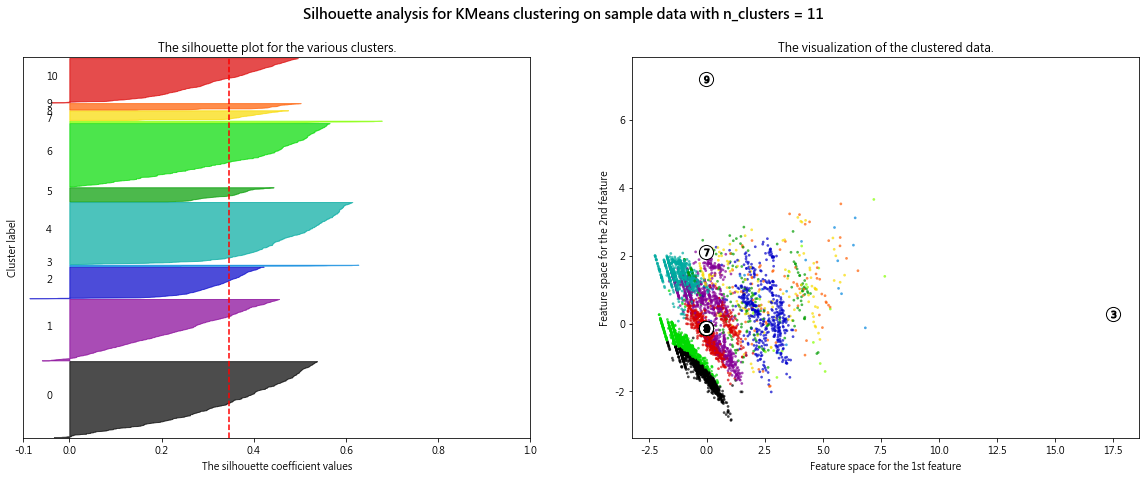

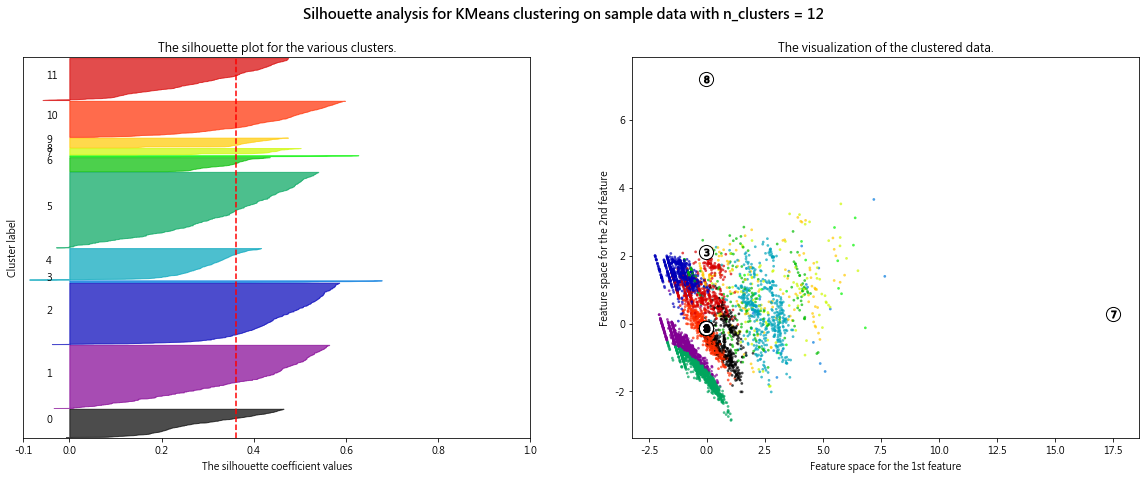

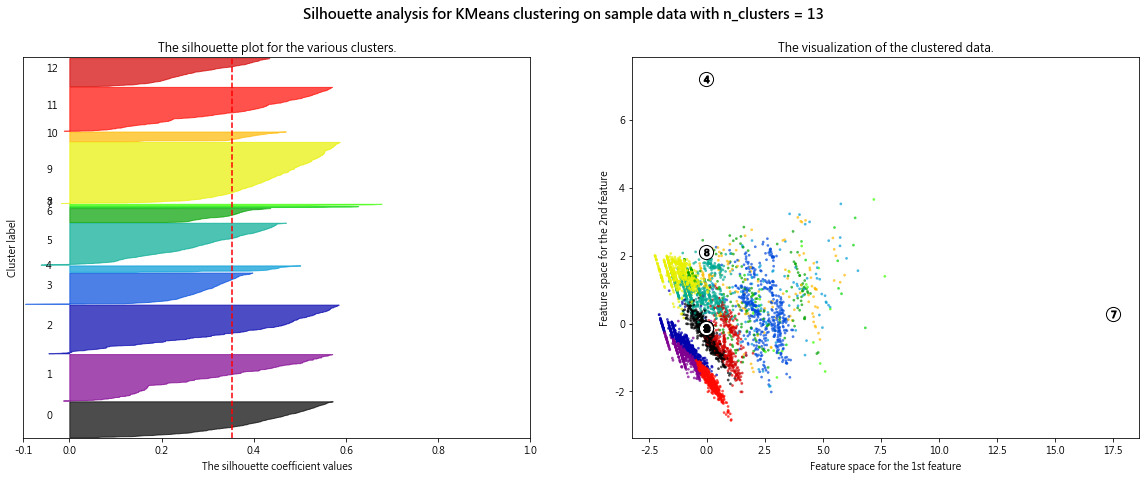

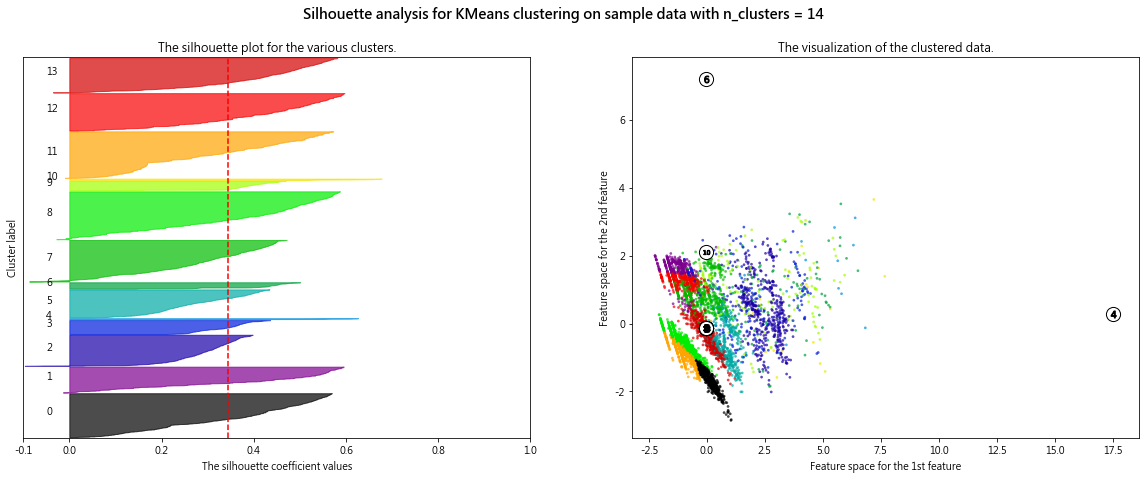

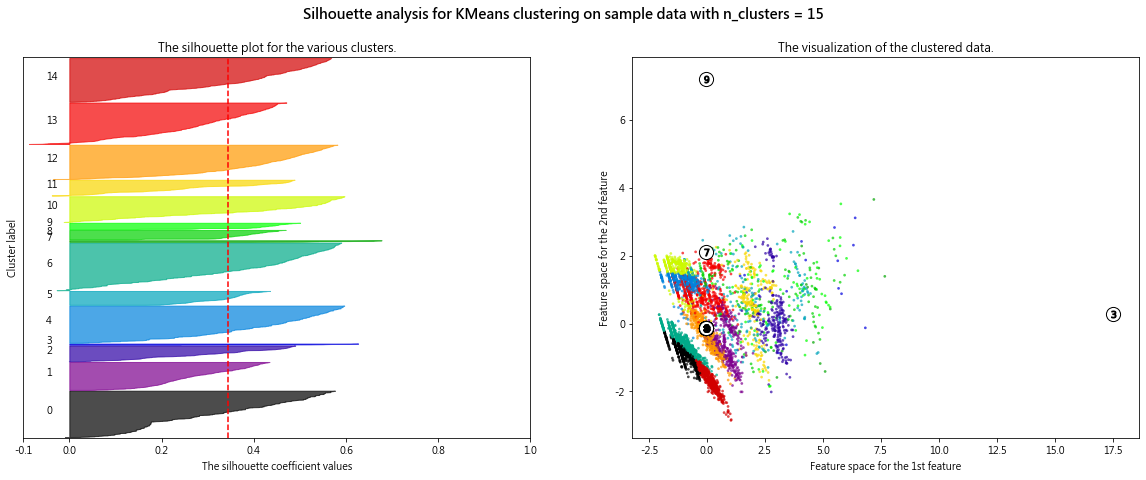

In [136]:
# silhouette_score plot
vs.Silhouette_score(r = 16, df = Wealth_scaled_features_df, reduced_df = reduced_data)
plt.savefig('Wealth_2019'+ '_Silhouette_score' + '.png')

## K Prototype Clustering

In [8]:
Wealth_scaledfeat_w_prop_df = Wealth_scaled_features_df
Wealth_scaledfeat_w_prop_df['Age_bins'] = Wealth_flat['Age_bins']
Wealth_scaledfeat_w_prop_df['Gender'] = Wealth.groupby(['Customer_ID'])['Gender'].first()
Wealth_scaledfeat_w_prop_df['Constellation'] = Wealth.groupby(['Customer_ID'])['Constellation'].first()
Wealth_scaledfeat_w_prop_df['Com_ID'] = Wealth.groupby(['Customer_ID'])['Com_ID'].first()
Wealth_scaledfeat_w_prop_df['Sales_ID'] = Wealth.groupby(['Customer_ID'])['Com_ID'].first()
Wealth_scaledfeat_w_prop_df.head()

Product_Variable    債券附條件交易  國內投信基金_RR1  國內投信基金_RR2  國內投信基金_RR3  國內投信基金_RR4  \
Customer_ID                                                                   
22554052          -0.057161    7.192167   -0.211251   -0.610481   -1.276327   
22973724          17.494537   -0.139040   -0.211251   -0.610481   -1.276327   
23360414          -0.057161   -0.139040   -0.211251   -0.610481    1.809759   
28160034          -0.057161   -0.139040   -0.211251   -0.610481   -1.276327   
54664285          -0.057161    7.192167   -0.211251   -0.610481   -1.276327   

Product_Variable  國內投信基金_RR5    國內結構型商品    境外基金集保      外國債券  Buy_Amount  \
Customer_ID                                                               
22554052           -0.760315  -0.070752 -0.352867 -0.172595    2.402395   
22973724           -0.760315  14.133974 -0.352867 -0.172595    1.720459   
23360414           -0.760315  -0.070752 -0.352867 -0.172595    1.410369   
28160034            1.400125  -0.070752 -0.352867 -0.172595    0.232784   
54664285           -0.760315  -0.070752 -0.352867 -0.172595    1.883003   

Product_Variable       Age Age_bins Gender Constellation Com_ID Sales_ID  
Customer_ID                                                               
22554052         -1.075008    20-39  OTHER           金牛座   585H     585H  
22973724         -1.137270    20-39  OTHER           巨蟹座   585Y     585Y  
23360414         -1.198995    20-39  OTHER           金牛座   585M     585M  
28160034         -2.149966     0-19  OTHER           金牛座   5855     5855  
54664285         -2.507004     0-19  OTHER           摩羯座   585H     585H

In [9]:
from kmodes.kprototypes import KPrototypes

best_size = 3
# K Prototype Clustering
kproto = KPrototypes(n_clusters = best_size, init='Cao', verbose=2)
kproto_preds = kproto.fit_predict(Wealth_scaledfeat_w_prop_df, categorical=[11, 12, 13, 14, 15])
kproto_centers = kproto.cluster_centroids_

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 572, ncost: 55194.47850209935
Run: 1, iteration: 2/100, moves: 73, ncost: 54872.79733302093
Run: 1, iteration: 3/100, moves: 4, ncost: 54871.998960523066
Run: 1, iteration: 4/100, moves: 0, ncost: 54871.998960523066
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 936, ncost: 59144.58058125599
Run: 2, iteration: 2/100, moves: 672, ncost: 57738.11827678255
Run: 2, iteration: 3/100, moves: 431, ncost: 56780.27556200921
Run: 2, iteration: 4/100, moves: 261, ncost: 56406.33838765002
Run: 2, iteration: 5/100, moves: 56, ncost: 56390.763280172614
Run: 2, iteration: 6/100, moves: 51, ncost: 56372.91696286717
Run: 2, iteration: 7/100, moves: 99, ncost: 56322.60598072047
Run: 2, iteration: 8/100, moves: 116, ncost: 56216.960028736525
Run: 2, iteration: 9/100, moves: 53, ncost: 56190.70183204629
Run: 2, iteration: 10/100,

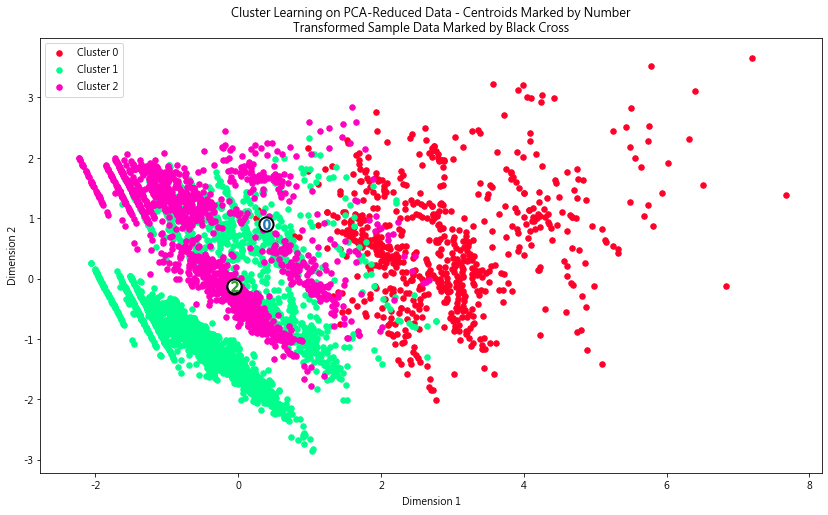

In [140]:
# Plot k prototype
vs.cluster_results(reduced_data, kproto_preds, kproto_centers[0])

## Data Recovery

In [93]:
## K means
# Inverse transform the box-cox centers
true_centers = bc.inverse_transform(kmeans_centers)
true_centers[np.isnan(true_centers)] = 1

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(kmeans_centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = Wealth_scaled_features_df.iloc[:,:11].keys())
true_centers.index = segments
display(true_centers)

# Segment mean
Wealth_flat['Label'] = optimized_kmeans.labels_
display(round(Wealth_flat.groupby('Label').mean()))

Product_Variable  債券附條件交易  國內投信基金_RR1  國內投信基金_RR2  國內投信基金_RR3  國內投信基金_RR4  \
Segment 0             1.0         1.0         1.0         3.0      8693.0   
Segment 1             1.0         1.0         1.0        11.0      4005.0   
Segment 2             1.0         1.0         1.0         2.0       441.0   

Product_Variable  國內投信基金_RR5  國內結構型商品  境外基金集保  外國債券  Buy_Amount   Age  
Segment 0                1.0      1.0     1.0   1.0     35103.0  49.0  
Segment 1               12.0      1.0    25.0   1.0   3157537.0  49.0  
Segment 2            26796.0      1.0     1.0   1.0     50638.0  49.0

Product_Variable  債券附條件交易  國內投信基金_RR1  國內投信基金_RR2  國內投信基金_RR3  國內投信基金_RR4  \
Label                                                                       
0                     1.0        11.0     11853.0     48835.0    106160.0   
1                 44791.0    905389.0     33489.0    156668.0    204484.0   
2                     1.0        33.0      6324.0     31756.0    102610.0   

Product_Variable  國內投信基金_RR5   國內結構型商品     境外基金集保    外國債券  Buy_Amount   Age  
Label                                                                        
0                        1.0       1.0       10.0  1192.0    168056.0  49.0  
1                    58844.0  495245.0  7207216.0  8231.0   9114351.0  48.0  
2                    71687.0       1.0        3.0   401.0    212809.0  48.0

In [10]:
## K mode
# Inverse transform the box-cox centers
true_centers = bc.inverse_transform(kproto_centers[0])
true_centers[np.isnan(true_centers)] = 1
df1 = pd.DataFrame(kproto_centers[1], columns = Wealth_scaledfeat_w_prop_df.iloc[:,[11, 12, 13, 14, 15]].keys())
df2 = pd.DataFrame(np.round(true_centers), columns = Wealth_scaled_features_df.iloc[:,:11].keys())

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,best_size)]
true_centers_true = df1.merge(df2, left_index = True, right_index = True)
true_centers_true.index = segments
display(true_centers_true)

# Segment mean
Wealth_flat['Label'] = kproto.labels_
display(round(Wealth_flat.groupby('Label').mean()))

Product_Variable Age_bins  Gender Constellation Com_ID Sales_ID  債券附條件交易  \
Segment 0           50-59  FEMALE           天秤座   5856     5856      1.0   
Segment 1           50-59  FEMALE           處女座   5850     5850      1.0   
Segment 2           50-59  FEMALE           天蠍座   5850     5850      1.0   

Product_Variable  國內投信基金_RR1  國內投信基金_RR2  國內投信基金_RR3  國內投信基金_RR4  國內投信基金_RR5  \
Segment 0                1.0         1.0         2.0       440.0     26782.0   
Segment 1                1.0         1.0         3.0      8693.0         1.0   
Segment 2                1.0         1.0        11.0      4042.0        12.0   

Product_Variable  國內結構型商品  境外基金集保  外國債券  Buy_Amount   Age  
Segment 0             1.0     1.0   1.0     50615.0  49.0  
Segment 1             1.0     1.0   1.0     35103.0  49.0  
Segment 2             1.0    25.0   1.0   3192178.0  49.0

Product_Variable  債券附條件交易  國內投信基金_RR1  國內投信基金_RR2  國內投信基金_RR3  國內投信基金_RR4  \
Label                                                                       
0                     1.0        33.0      6320.0     31737.0    102548.0   
1                     1.0        11.0     11853.0     48835.0    106160.0   
2                 44859.0    906753.0     33540.0    156904.0    204792.0   

Product_Variable  國內投信基金_RR5   國內結構型商品     境外基金集保    外國債券  Buy_Amount   Age  
Label                                                                        
0                    71651.0       1.0       11.0   401.0    212695.0  48.0  
1                        1.0       1.0       10.0  1192.0    168056.0  49.0  
2                    58914.0  495990.0  7218051.0  8244.0   9128040.0  48.0

In [11]:
# Plot the Com_ID_df features
Wealth_scaledfeat_w_prop_df['Label'] = kproto.labels_
for tag in np.sort(Wealth_scaledfeat_w_prop_df['Label'].unique()):
    filter_ = Wealth_scaledfeat_w_prop_df['Label'] == tag
    Com_ID_df = Wealth_scaledfeat_w_prop_df[filter_].groupby('Com_ID').size().to_frame(name = 'Size')
    print('Gp_{}'.format(tag))
    display(Com_ID_df.sort_values(by = 'Size',ascending = False))

Gp_0


Size
Com_ID      
5856     153
585D     137
5857     127
5851      91
5853      81
585W      76
5850      70
585Z      65
585b      62
585J      60
5859      59
585m      55
585H      52
5855      52
585U      47
585R      44
585Q      39
5858      38
585S      36
585M      34
5854      33
585I      31
585Y      31
585g      31
585A      26
585E      22
585P      21
585F      20
5852      20
585c      16
585B      14

Gp_1


Size
Com_ID      
5850     219
585J     183
5853     181
5856     176
5857     164
585H     164
585Q     128
585A     118
585D     110
585S     110
5852     104
5851      95
5859      84
585b      83
585Z      83
585R      75
5854      70
585M      68
585U      68
585E      64
585F      63
5855      61
585g      60
585m      58
585I      53
585W      49
5858      48
585Y      47
585P      45
585c      45
585B      37

Gp_2


Size
Com_ID      
5850      76
585H      74
5857      64
585J      35
5859      29
585Q      29
5851      24
585m      23
585R      21
5856      21
585Y      19
585D      19
5858      18
5852      17
5854      17
585M      16
585I      15
585U      15
585A      15
585b      14
585Z      14
5853      13
585F      12
585W      11
585S      11
585g      10
585E       8
585c       7
5855       6
585P       6
585B       5

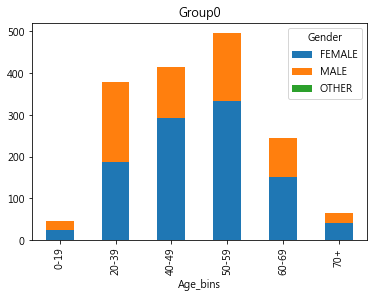

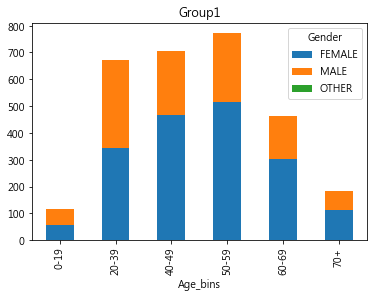

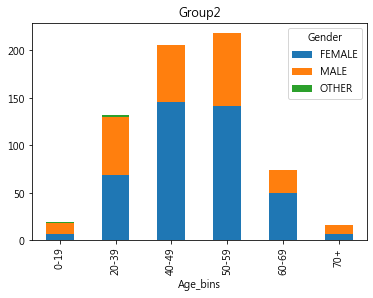

In [12]:
# Plot the features
for tag in np.sort(Wealth_flat['Label'].unique()):
    filter_ = Wealth_flat['Label'] == tag
    ct = pd.crosstab(Wealth_flat[filter_].Age_bins, Wealth_flat[filter_].Gender, margins = False)
    ct.plot.bar(stacked=True)
    plt.title('Group{}'.format(tag))

In [13]:
# Save Customer list 
Wealth_flat.loc[:,['Age', 'Gender', 'Label']].to_excel('Wealth_2019_Customer_list.xlsx')

## ANOVA test

In [95]:
# ANOVA test(k means)
import scipy.stats as ss
Wealth_flat_t = Wealth_flat.drop(['Gender','Age_bins'], axis = 1)
for Variable in Wealth_flat_t.keys():
    samples = [val[1] for val in Wealth_flat_t.groupby('Label')[Variable]]
    f_val, p_val = ss.f_oneway(*samples)
    print('Variable: {}, F value: {:.3f}, p value: {:.3f}'.format(Variable, f_val, p_val))

Variable: 債券附條件交易, F value: 15.314, p value: 0.000
Variable: 國內投信基金_RR1, F value: 23.979, p value: 0.000
Variable: 國內投信基金_RR2, F value: 4.931, p value: 0.007
Variable: 國內投信基金_RR3, F value: 49.417, p value: 0.000
Variable: 國內投信基金_RR4, F value: 22.152, p value: 0.000
Variable: 國內投信基金_RR5, F value: 47.247, p value: 0.000
Variable: 國內結構型商品, F value: 21.255, p value: 0.000
Variable: 境外基金集保, F value: 650.543, p value: 0.000
Variable: 外國債券, F value: 15.019, p value: 0.000
Variable: Buy_Amount, F value: 661.852, p value: 0.000
Variable: Age, F value: 0.227, p value: 0.797
Variable: Label, F value: inf, p value: 0.000


C:\Users\User\anaconda3\lib\site-packages\scipy\stats\stats.py:3349: RuntimeWarning: divide by zero encountered in double_scalars
  f = msb / msw


In [15]:
# ANOVA test(k mode)
import scipy.stats as ss
Wealth_flat_t = Wealth_flat.drop(['Gender','Age_bins'], axis = 1)
for Variable in Wealth_flat_t.keys():
    samples = [val[1] for val in Wealth_flat_t.groupby('Label')[Variable]]
    f_val, p_val = ss.f_oneway(*samples)
    print('Variable: {}, F value: {:.3f}, p value: {:.3f}'.format(Variable, f_val, p_val))

Variable: 債券附條件交易, F value: 15.340, p value: 0.000
Variable: 國內投信基金_RR1, F value: 24.021, p value: 0.000
Variable: 國內投信基金_RR2, F value: 4.946, p value: 0.007
Variable: 國內投信基金_RR3, F value: 49.568, p value: 0.000
Variable: 國內投信基金_RR4, F value: 22.273, p value: 0.000
Variable: 國內投信基金_RR5, F value: 47.236, p value: 0.000
Variable: 國內結構型商品, F value: 21.292, p value: 0.000
Variable: 境外基金集保, F value: 651.942, p value: 0.000
Variable: 外國債券, F value: 15.051, p value: 0.000
Variable: Buy_Amount, F value: 663.336, p value: 0.000
Variable: Age, F value: 0.226, p value: 0.798
Variable: Label, F value: 12180091655912333312.000, p value: 0.000


In [16]:
# Chi-square for categorical var (k mode)
Wealth_scaledfeat_w_prop_df_chi = Wealth_scaledfeat_w_prop_df.iloc[:,-5:]
Wealth_scaledfeat_w_prop_df_chi['Label'] = kproto.labels_

for Variable in Wealth_scaledfeat_w_prop_df_chi.keys():
    samples = pd.crosstab(index = Wealth_scaledfeat_w_prop_df_chi['Label'], columns = Wealth_scaledfeat_w_prop_df_chi[Variable])
    chisq, p_val, df, ex = ss.chi2_contingency(samples, correction = False)
    print('Variable: {}, chi value: {:.3f}, p value: {:.3f}'.format(Variable, chisq, p_val))

Variable: Gender, chi value: 8.980, p value: 0.062
Variable: Constellation, chi value: 25.754, p value: 0.262
Variable: Com_ID, chi value: 411.828, p value: 0.000
Variable: Sales_ID, chi value: 411.828, p value: 0.000
Variable: Label, chi value: 10440.000, p value: 0.000


In [17]:
# Turkey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd

writer = pd.ExcelWriter('Wealth_2019_Turkey_HSD_sheets.xlsx', engine='xlsxwriter')
for Variable in Wealth_flat_t.keys():
    Results = pairwise_tukeyhsd(Wealth_flat_t[Variable], Wealth_flat_t['Label'])
    pd.DataFrame(data=Results._results_table.data[1:], columns=Results._results_table.data[0])\
    .to_excel(writer, sheet_name = Variable)
writer.save()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:1291: RuntimeWarning: divide by zero encountered in true_divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic


In [37]:
# T test with onw population mean
mean_list = list(Wealth_flat.mean())
Segment = []
Var = []
T_test = []

for index_1, label_name in enumerate(Wealth_flat_t.groupby('Label')):
    for index_2,col in enumerate(label_name[1]):
        t, p_val = ss.ttest_1samp(label_name[1][col],mean_list[index_2])
        Segment.append(index_1)
        Var.append(col)
        T_test.append((round(t,2),round(p_val,2)))
# T_test_df        
T_test_df = pd.DataFrame()
T_test_df['Segment'] = Segment
T_test_df['Var'] = Var
T_test_df['T_test(t,p_val)'] = T_test

# Export
T_test_df.groupby(['Var','Segment']).first().drop('Label').unstack().T.to_excel('Wealth_2019_T_test.xlsx')

## Split Young and Old

In [38]:
# Split Data
Age_Threshold_1 = 40 
#Age_Threshold_2 = 60

Age_filter = Wealth['Age'] < Age_Threshold_1
dirName_1 = 'C:/Users/user/Desktop/Data&Code/Wealth/Wealth_2019/Wealth_Young'
dirName_2 = 'C:/Users/user/Desktop/Data&Code/Wealth/Wealth_2019/Wealth_Old'
os.mkdir(dirName_1)
os.mkdir(dirName_2)

Wealth[Age_filter].to_excel(dirName_1 + '/Wealth_Young.xlsx')
Wealth[~Age_filter].to_excel(dirName_2 + '/Wealth_Old.xlsx')

## Young

In [99]:
# Change working directory
os.chdir('C:/Users/User/Desktop/Data&Code/Wealth/Wealth_2019/Wealth_Young')

In [100]:
# Import Data
Wealth = pd.read_excel('Wealth_Young.xlsx')

# Create Product_sub_Category 
Wealth['Product_sub_Category'] = Wealth['Product_Category'] + '_' + Wealth['Risk_Grade']
Wealth['Product_Variable'] = Product_sub_Category(Wealth, 'Product_Category', 'Product_sub_Category', '國內投信基金')

# Group by created variables
bins = [0, 20, 40, 50, 60, 70, 120]
labels = ['0-19', '20-39', '40-49', '50-59', '60-69','70+']
Wealth_flat = Wealth.groupby(['Customer_ID','Product_Variable'])['Buy_Amount'].sum().unstack()
Wealth_flat['Buy_Amount'] = Wealth.groupby(['Customer_ID'])['Buy_Amount'].sum()
Wealth_flat['Age'] = Wealth.groupby(['Customer_ID'])['Age'].first()
Wealth_flat['Gender'] = Wealth.groupby(['Customer_ID'])['Gender'].first()
Wealth_flat.fillna(value=1, inplace=True)

# Age bin
Wealth_flat['Age_bins'] = pd.cut(x=Wealth_flat['Age'], bins = bins, labels = labels,include_lowest = True)
Wealth_flat.head()

Product_Variable    債券附條件交易   國內投信基金_RR1  國內投信基金_RR2  國內投信基金_RR3  國內投信基金_RR4  \
Customer_ID                                                                    
22554052                1.0  200000000.0         1.0         1.0         1.0   
22973724          5100199.9          1.0         1.0         1.0         1.0   
23360414                1.0          1.0         1.0         1.0   2000000.0   
28160034                1.0          1.0         1.0         1.0         1.0   
54664285                1.0   12000000.0         1.0         1.0         1.0   

Product_Variable  國內投信基金_RR5    國內結構型商品  境外基金集保  外國債券   Buy_Amount  Age  \
Customer_ID                                                               
22554052                 1.0        1.0     1.0   1.0  200000000.0   33   
22973724                 1.0  1012000.0     1.0   1.0    6112199.9   32   
23360414                 1.0        1.0     1.0   1.0    2000000.0   31   
28160034             96000.0        1.0     1.0   1.0      96000.0   14   
54664285                 1.0        1.0     1.0   1.0   12000000.0    6   

Product_Variable Gender Age_bins  
Customer_ID                       
22554052          OTHER    20-39  
22973724          OTHER    20-39  
23360414          OTHER    20-39  
28160034          OTHER     0-19  
54664285          OTHER     0-19

In [72]:
# Scatter_matrix plot of all features
wealth_flat_numeric = Wealth_flat.iloc[:,:-2]

# Scale the data using the Box Cox method
from sklearn.preprocessing import PowerTransformer

bc = PowerTransformer(method='box-cox')
Wealth_scaled_features = bc.fit_transform(wealth_flat_numeric.values)
Wealth_scaled_features_df = pd.DataFrame(Wealth_scaled_features, index=wealth_flat_numeric.index,\
                                         columns=wealth_flat_numeric.columns)

In [39]:
# Apply PCA by fitting data with only 2 Dimensions
pca = PCA(n_components = 2, random_state = 0)
pca = pca.fit(Wealth_scaled_features_df)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(Wealth_scaled_features_df)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [73]:
# Clustering(silhouette_score method)
# silhouette_score method
num_clusters = np.arange(2,30)
kmeans_results = {}
for size in num_clusters:
    kmeans = KMeans(n_clusters = size).fit(Wealth_scaled_features_df)
    preds = kmeans.predict(Wealth_scaled_features_df)
    kmeans_results[size] = metrics.silhouette_score(Wealth_scaled_features_df, preds)
    
best_size = max(kmeans_results, key = kmeans_results.get)

Wealth_scaledfeat_w_prop_df = Wealth_scaled_features_df
Wealth_scaledfeat_w_prop_df['Age_bins'] = Wealth_flat['Age_bins']
Wealth_scaledfeat_w_prop_df['Gender'] = Wealth.groupby(['Customer_ID'])['Gender'].first()
Wealth_scaledfeat_w_prop_df['Constellation'] = Wealth.groupby(['Customer_ID'])['Constellation'].first()
Wealth_scaledfeat_w_prop_df['Com_ID'] = Wealth.groupby(['Customer_ID'])['Com_ID'].first()
Wealth_scaledfeat_w_prop_df['Sales_ID'] = Wealth.groupby(['Customer_ID'])['Com_ID'].first()

# K Prototype Clustering
kproto = KPrototypes(n_clusters = best_size, init='Cao', verbose=2)
kproto_preds = kproto.fit_predict(Wealth_scaledfeat_w_prop_df, categorical=[11, 12, 13, 14, 15])
kproto_centers = kproto.cluster_centroids_

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 368, ncost: 15144.843495852585
Run: 1, iteration: 2/100, moves: 123, ncost: 15018.789012343832
Run: 1, iteration: 3/100, moves: 32, ncost: 15008.288354677004
Run: 1, iteration: 4/100, moves: 2, ncost: 15007.572671313383
Run: 1, iteration: 5/100, moves: 3, ncost: 15006.343826858001
Run: 1, iteration: 6/100, moves: 0, ncost: 15006.343826858001
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 127, ncost: 14898.54831476028
Run: 2, iteration: 2/100, moves: 96, ncost: 14609.31453275443
Run: 2, iteration: 3/100, moves: 13, ncost: 14581.023773567626
Run: 2, iteration: 4/100, moves: 2, ncost: 14580.19577135903
Run: 2, iteration: 5/100, moves: 0, ncost: 14580.19577135903
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 147, ncost: 14932.99897031234
Run: 3, it

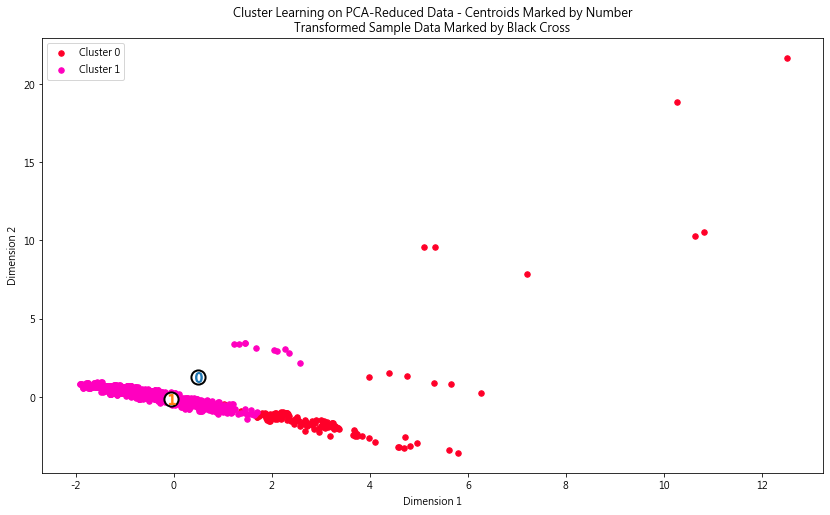

In [32]:
# Plot k prototype
vs.cluster_results(reduced_data, kproto_preds, kproto_centers[0])

For n_clusters = 2 The average silhouette_score is : 0.4709920118647777
For n_clusters = 3 The average silhouette_score is : 0.3032898576098283
For n_clusters = 4 The average silhouette_score is : 0.24228420301072245
For n_clusters = 5 The average silhouette_score is : 0.2654839241225804
For n_clusters = 6 The average silhouette_score is : 0.32423452918422474
For n_clusters = 7 The average silhouette_score is : 0.3454995784735766
For n_clusters = 8 The average silhouette_score is : 0.38276224256372837
For n_clusters = 9 The average silhouette_score is : 0.38849970475812606
For n_clusters = 10 The average silhouette_score is : 0.4056940492012102
For n_clusters = 11 The average silhouette_score is : 0.3693378944511216
For n_clusters = 12 The average silhouette_score is : 0.3702351080689896
For n_clusters = 13 The average silhouette_score is : 0.3791348896775079
For n_clusters = 14 The average silhouette_score is : 0.3882870681712102
For n_clusters = 15 The average silhouette_score is : 0

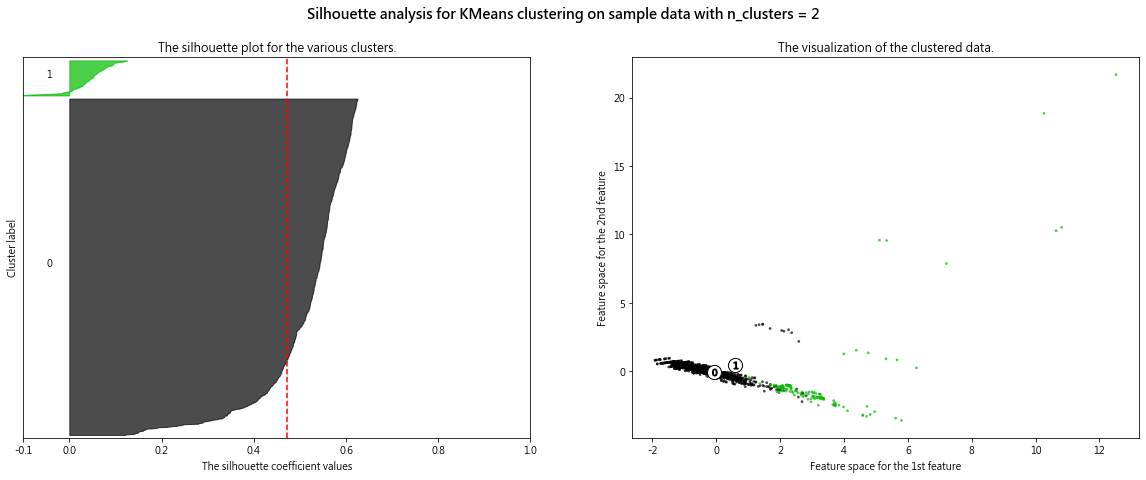

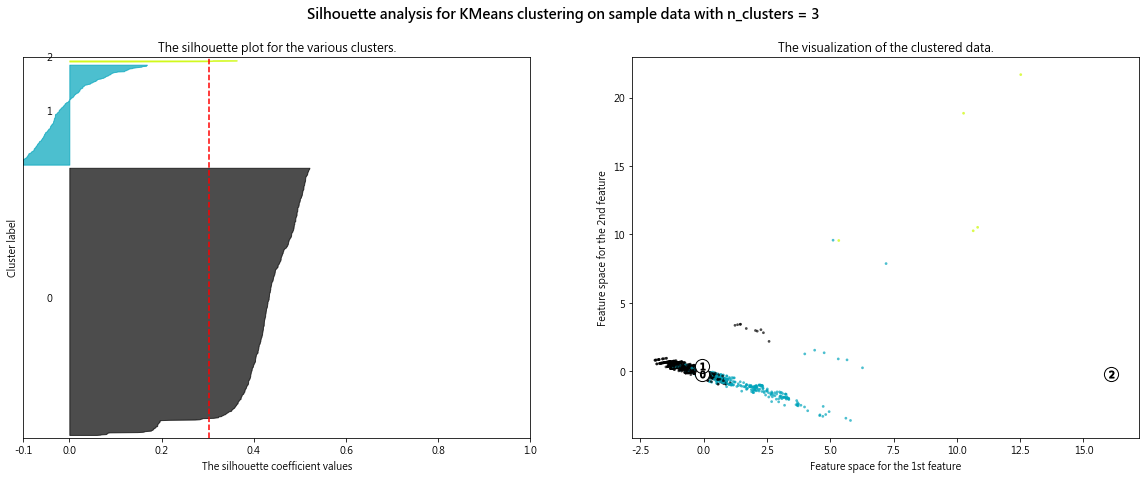

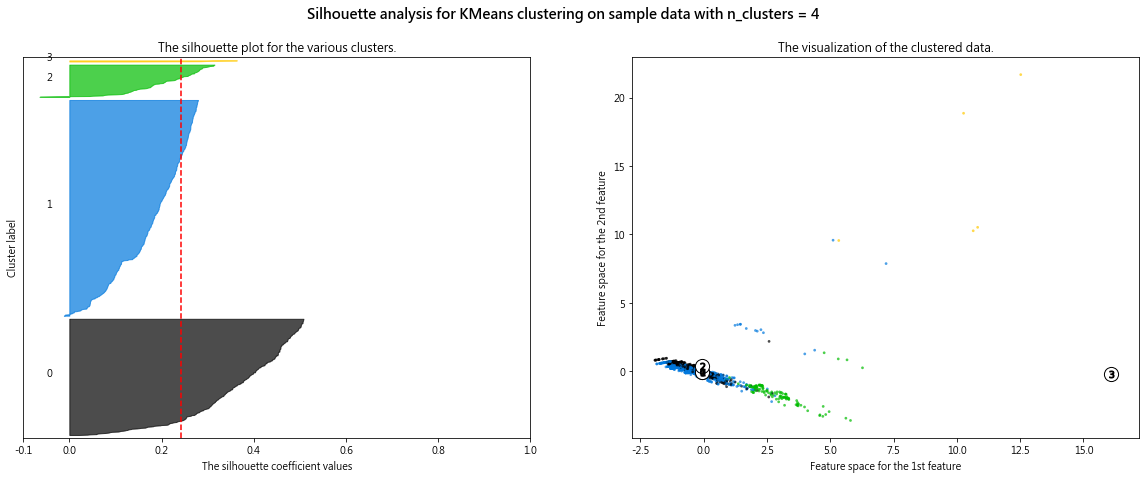

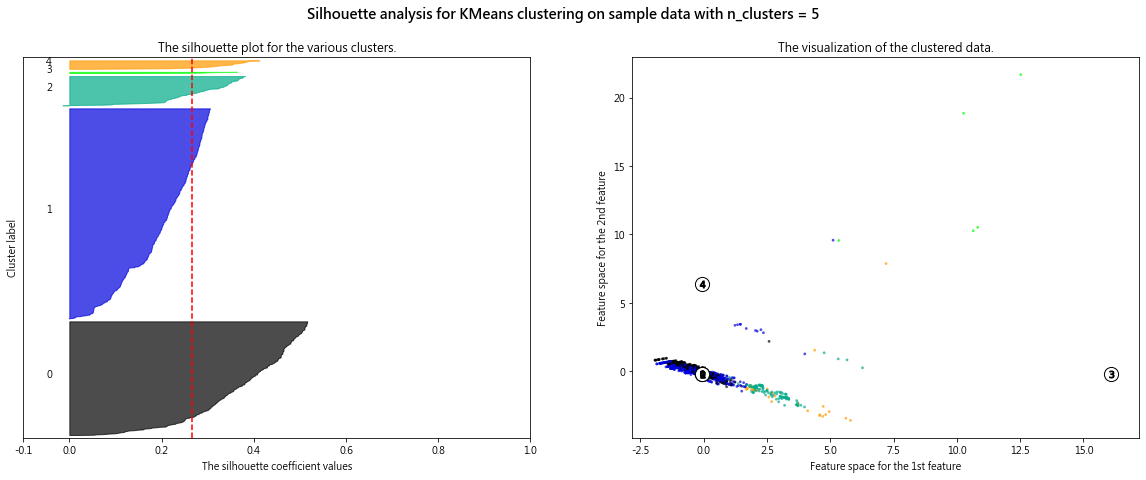

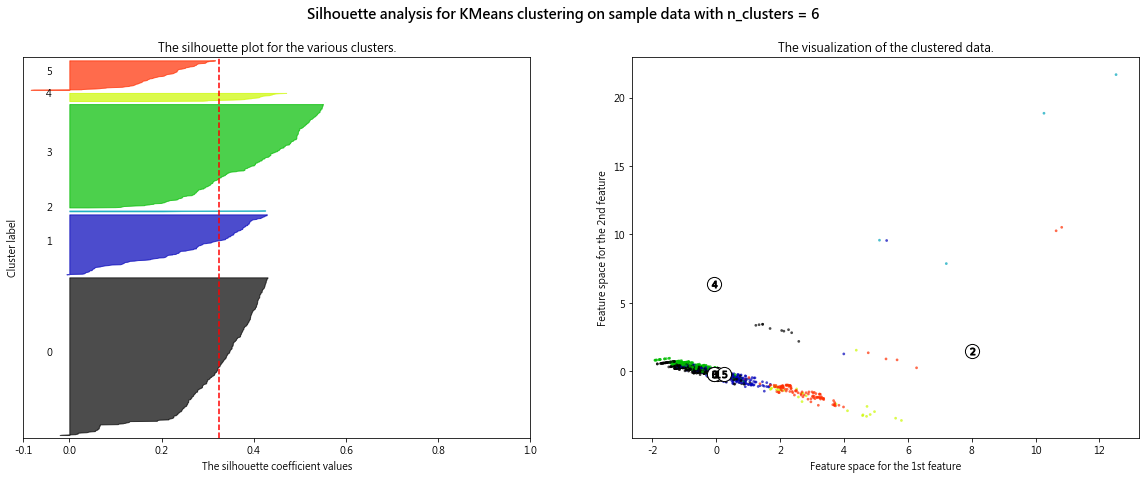

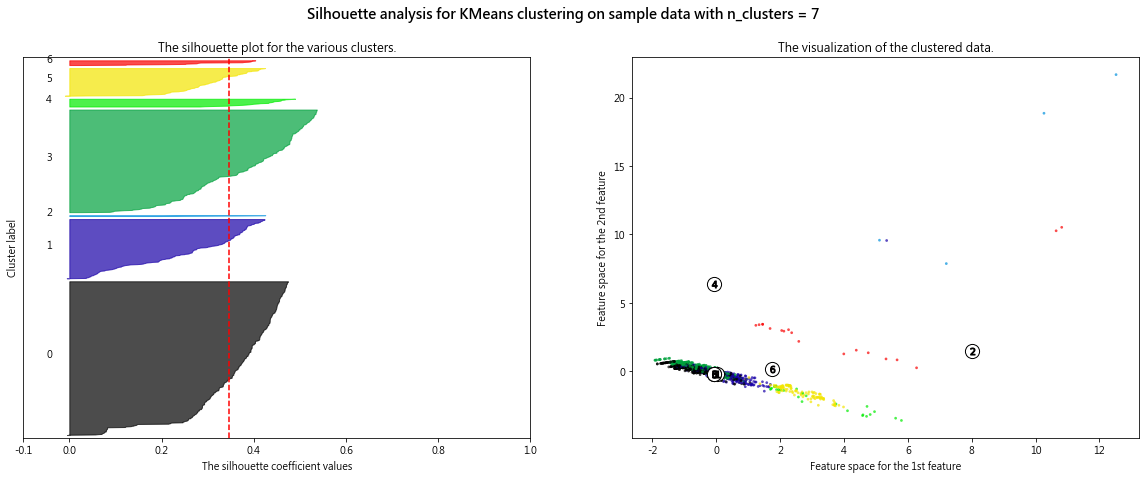

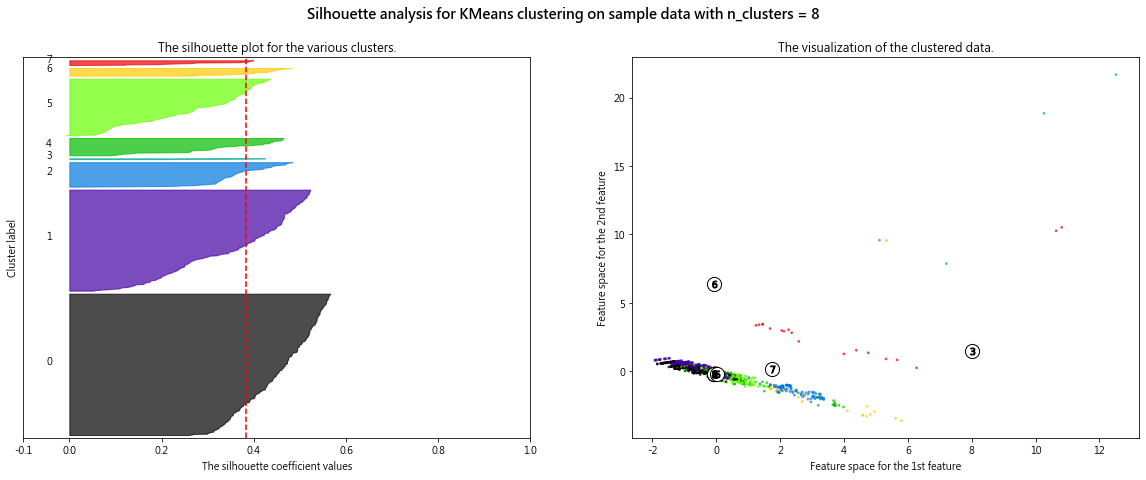

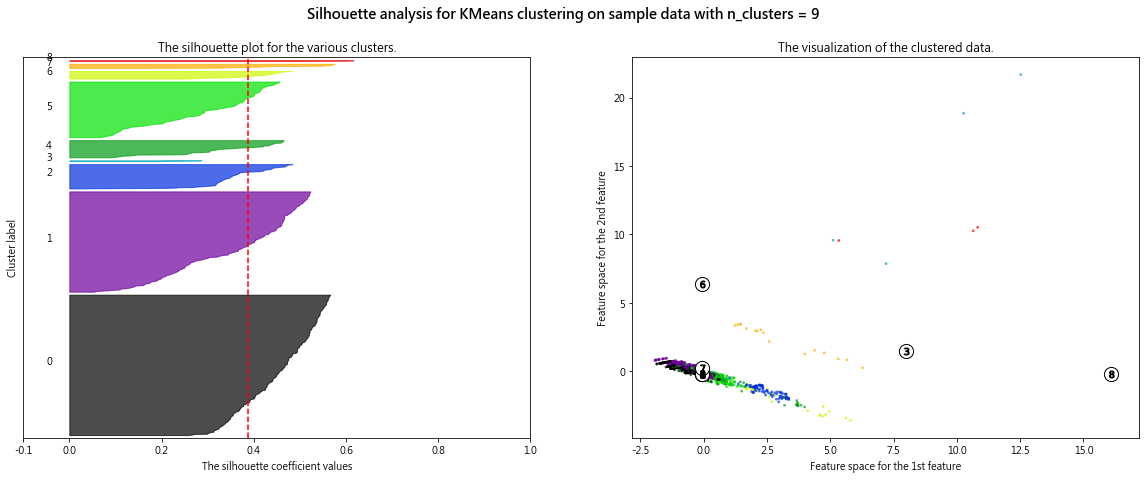

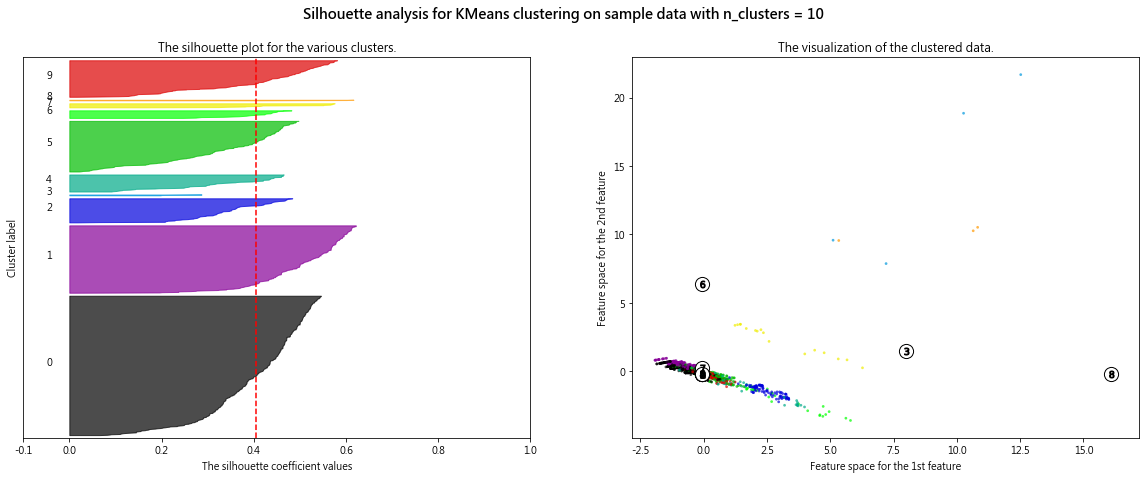

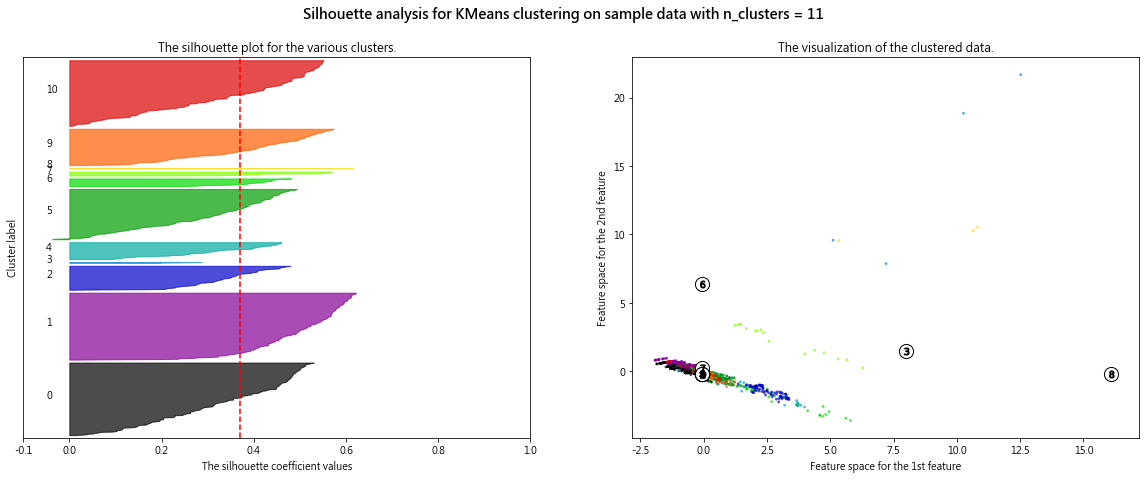

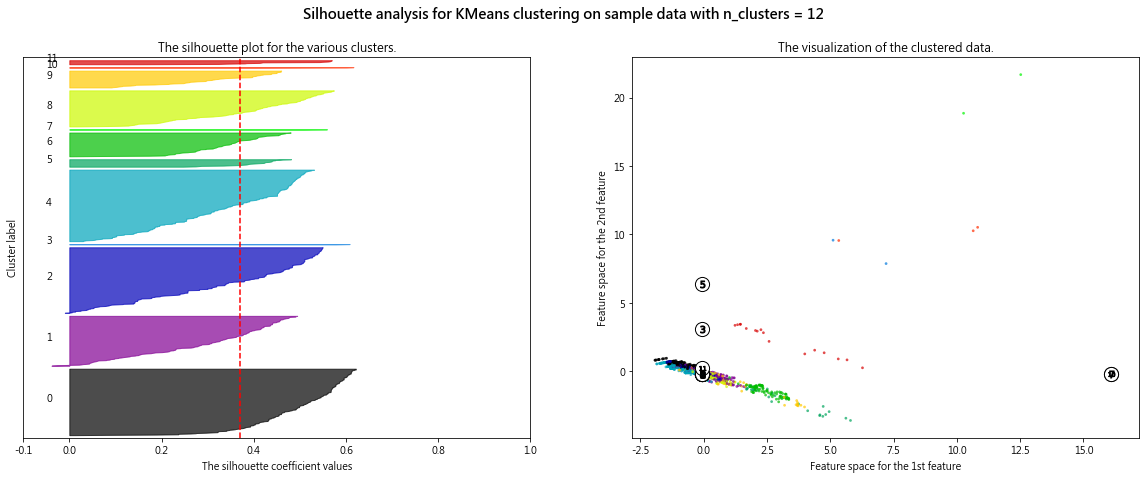

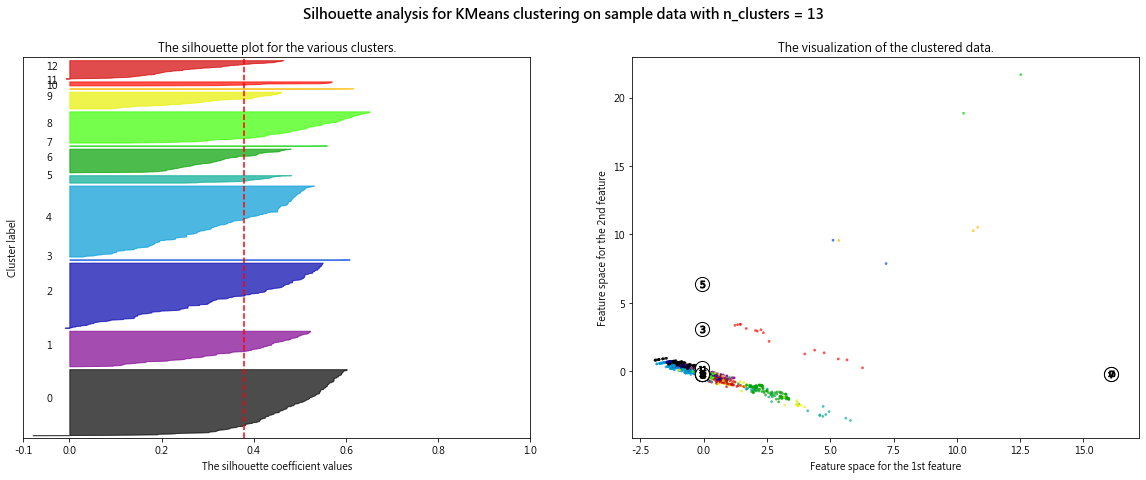

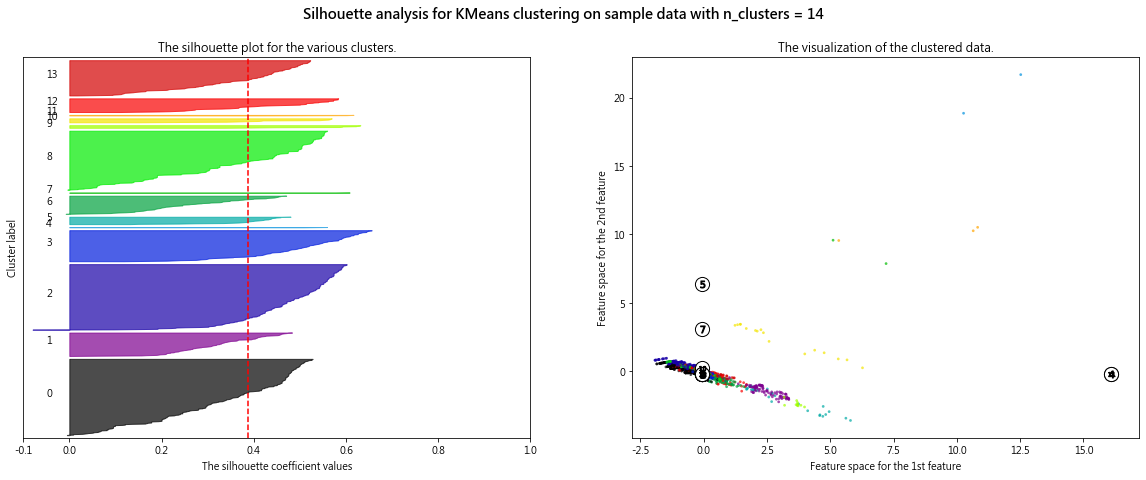

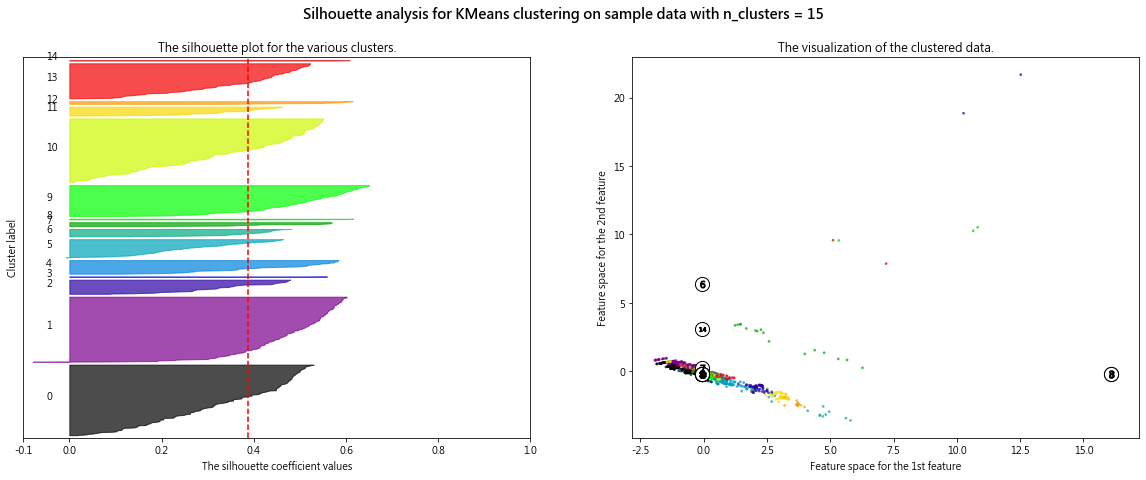

In [43]:
# silhouette_score plot
vs.Silhouette_score(r = 16, df = Wealth_scaled_features_df, reduced_df = reduced_data)
plt.savefig('Wealth_2019'+ '_Silhouette_score' + '.png')

In [76]:
## K mode
# Inverse transform the box-cox centers
true_centers = bc.inverse_transform(kproto_centers[0])
true_centers[np.isnan(true_centers)] = 1
df1 = pd.DataFrame(kproto_centers[1], columns = Wealth_scaledfeat_w_prop_df.iloc[:,[11, 12, 13, 14, 15]].keys())
df2 = pd.DataFrame(np.round(true_centers), columns = Wealth_scaled_features_df.iloc[:,:11].keys())

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(kmeans_centers))]
true_centers_true = df1.merge(df2, left_index = True, right_index = True)
true_centers_true.index = segments
display(true_centers_true)

# Segment mean
Wealth_flat['Label'] = kproto.labels_
display(round(Wealth_flat.groupby('Label').mean()))

Product_Variable Age_bins  Gender Constellation Com_ID Sales_ID  債券附條件交易  \
Segment 0           20-39  FEMALE           獅子座   5857     5857      1.0   
Segment 1           20-39  FEMALE           天秤座   585J     585J      1.0   

Product_Variable  國內投信基金_RR1  國內投信基金_RR2  國內投信基金_RR3  國內投信基金_RR4  國內投信基金_RR5  \
Segment 0                1.0         1.0         4.0      1017.0         7.0   
Segment 1                1.0         1.0         2.0      1502.0         7.0   

Product_Variable  國內結構型商品  境外基金集保  外國債券  Buy_Amount   Age  
Segment 0             1.0     9.0   1.0   2095439.0  31.0  
Segment 1             1.0     1.0   1.0     25147.0  29.0

Product_Variable  債券附條件交易  國內投信基金_RR1  國內投信基金_RR2  國內投信基金_RR3  國內投信基金_RR4  \
Label                                                                       
0                 55738.0   2302333.0     13370.0     72812.0     93588.0   
1                     1.0         1.0      4501.0     25152.0     71822.0   

Product_Variable  國內投信基金_RR5   國內結構型商品     境外基金集保     外國債券  Buy_Amount   Age  
Label                                                                         
0                    20433.0  130325.0  5849489.0  12723.0   8550804.0  30.0  
1                    18745.0       1.0        4.0    248.0    120467.0  28.0

In [45]:
# Save Customer list 
Wealth_flat.loc[:,['Age', 'Gender', 'Label']].to_excel('Wealth_2019_Young_Customer_list.xlsx')

In [77]:
# ANOVA test(k mode)
import scipy.stats as ss
Wealth_flat_t = Wealth_flat.drop(['Gender','Age_bins'], axis = 1)
for Variable in Wealth_flat_t.keys():
    samples = [val[1] for val in Wealth_flat_t.groupby('Label')[Variable]]
    f_val, p_val = ss.f_oneway(*samples)
    print('Variable: {}, F value: {:.3f}, p value: {:.3f}'.format(Variable, f_val, p_val))

Variable: 債券附條件交易, F value: 16.647, p value: 0.000
Variable: 國內投信基金_RR1, F value: 20.514, p value: 0.000
Variable: 國內投信基金_RR2, F value: 5.417, p value: 0.020
Variable: 國內投信基金_RR3, F value: 7.910, p value: 0.005
Variable: 國內投信基金_RR4, F value: 0.730, p value: 0.393
Variable: 國內投信基金_RR5, F value: 0.037, p value: 0.848
Variable: 國內結構型商品, F value: 12.225, p value: 0.000
Variable: 境外基金集保, F value: 247.604, p value: 0.000
Variable: 外國債券, F value: 12.473, p value: 0.000
Variable: Buy_Amount, F value: 185.825, p value: 0.000
Variable: Age, F value: 3.539, p value: 0.060
Variable: Label, F value: 2878347582938202624.000, p value: 0.000


In [78]:
# Chi-square for categorical var (k mode)
Wealth_scaledfeat_w_prop_df_chi = Wealth_scaledfeat_w_prop_df.iloc[:,-5:]
Wealth_scaledfeat_w_prop_df_chi['Label'] = kproto.labels_

for Variable in Wealth_scaledfeat_w_prop_df_chi.keys():
    samples = pd.crosstab(index = Wealth_scaledfeat_w_prop_df_chi['Label'], columns = Wealth_scaledfeat_w_prop_df_chi[Variable])
    chisq, p_val, df, ex = ss.chi2_contingency(samples, correction = False)
    print('Variable: {}, chi value: {:.3f}, p value: {:.3f}'.format(Variable, chisq, p_val))

Variable: Age_bins, chi value: 0.046, p value: 0.831
Variable: Gender, chi value: 9.471, p value: 0.009
Variable: Constellation, chi value: 8.566, p value: 0.662
Variable: Com_ID, chi value: 64.750, p value: 0.000
Variable: Sales_ID, chi value: 64.750, p value: 0.000
Variable: Label, chi value: 1296.000, p value: 0.000


In [85]:
# Paired T test 
writer = pd.ExcelWriter('Wealth_2019_Young_Turkey_HSD_sheets.xlsx', engine='xlsxwriter')
filter_ = Wealth_flat_t['Label'] == 0

for Variable in Wealth_flat_t.keys():
    t_val, p_val = ss.ttest_ind(Wealth_flat_t[filter_][Variable], Wealth_flat_t[~filter_][Variable])
    print('Variable: {}, t value: {:.3f}, p value: {:.3f}'.format(Variable, t_val, p_val))

Variable: 債券附條件交易, t value: 4.080, p value: 0.000
Variable: 國內投信基金_RR1, t value: 4.529, p value: 0.000
Variable: 國內投信基金_RR2, t value: 2.327, p value: 0.020
Variable: 國內投信基金_RR3, t value: 2.812, p value: 0.005
Variable: 國內投信基金_RR4, t value: 0.855, p value: 0.393
Variable: 國內投信基金_RR5, t value: 0.192, p value: 0.848
Variable: 國內結構型商品, t value: 3.496, p value: 0.000
Variable: 境外基金集保, t value: 15.735, p value: 0.000
Variable: 外國債券, t value: 3.532, p value: 0.000
Variable: Buy_Amount, t value: 13.632, p value: 0.000
Variable: Age, t value: 1.881, p value: 0.060
Variable: Label, t value: -inf, p value: 0.000


## Old

In [86]:
# Change working directory
os.chdir('C:/Users/User/Desktop/Data&Code/Wealth/Wealth_2019/Wealth_Old')

In [87]:
# Import Data
Wealth = pd.read_excel('Wealth_Old.xlsx')

# Create Product_sub_Category 
Wealth['Product_sub_Category'] = Wealth['Product_Category'] + '_' + Wealth['Risk_Grade']
Wealth['Product_Variable'] = Product_sub_Category(Wealth, 'Product_Category', 'Product_sub_Category', '國內投信基金')

# Group by created variables
bins = [0, 20, 40, 50, 60, 70, 120]
labels = ['0-19', '20-39', '40-49', '50-59', '60-69','70+']
Wealth_flat = Wealth.groupby(['Customer_ID','Product_Variable'])['Buy_Amount'].sum().unstack()
Wealth_flat['Buy_Amount'] = Wealth.groupby(['Customer_ID'])['Buy_Amount'].sum()
Wealth_flat['Age'] = Wealth.groupby(['Customer_ID'])['Age'].first()
Wealth_flat['Gender'] = Wealth.groupby(['Customer_ID'])['Gender'].first()
Wealth_flat.fillna(value=1, inplace=True)

# Age bin
Wealth_flat['Age_bins'] = pd.cut(x=Wealth_flat['Age'], bins = bins, labels = labels,include_lowest = True)
Wealth_flat.head()

Product_Variable  債券附條件交易  國內投信基金_RR1  國內投信基金_RR2  國內投信基金_RR3  國內投信基金_RR4  \
Customer_ID                                                                 
A100011166            1.0         1.0         1.0      6000.0         1.0   
A100113996            1.0         1.0         1.0    100000.0    120000.0   
A100132017            1.0         1.0         1.0         1.0     36000.0   
A100192031            1.0         1.0         1.0         1.0      3000.0   
A100582848            1.0         1.0         1.0         1.0     36000.0   

Product_Variable  國內投信基金_RR5  國內結構型商品  境外基金集保  外國債券  Buy_Amount  Age Gender  \
Customer_ID                                                                   
A100011166               1.0      1.0     1.0   1.0      6000.0   68   MALE   
A100113996               1.0      1.0     1.0   1.0    220000.0   68   MALE   
A100132017               1.0      1.0     1.0   1.0     36000.0   81   MALE   
A100192031            3000.0      1.0     1.0   1.0      6000.0   70   MALE   
A100582848               1.0      1.0     1.0   1.0     36000.0   81   MALE   

Product_Variable Age_bins  
Customer_ID                
A100011166          60-69  
A100113996          60-69  
A100132017            70+  
A100192031          60-69  
A100582848            70+

In [88]:
# Scatter_matrix plot of all features
wealth_flat_numeric = Wealth_flat.iloc[:,:-2]

# Scale the data using the Box Cox method
from sklearn.preprocessing import PowerTransformer

bc = PowerTransformer(method='box-cox')
Wealth_scaled_features = bc.fit_transform(wealth_flat_numeric.values)
Wealth_scaled_features_df = pd.DataFrame(Wealth_scaled_features, index=wealth_flat_numeric.index,\
                                         columns=wealth_flat_numeric.columns)

In [89]:
# Apply PCA by fitting data with only 2 Dimensions
pca = PCA(n_components = 2, random_state = 0)
pca = pca.fit(Wealth_scaled_features_df)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(Wealth_scaled_features_df)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [91]:
# Clustering(silhouette_score method)
# silhouette_score method
num_clusters = np.arange(2,30)
kmeans_results = {}
for size in num_clusters:
    kmeans = KMeans(n_clusters = size).fit(Wealth_scaled_features_df)
    preds = kmeans.predict(Wealth_scaled_features_df)
    kmeans_results[size] = metrics.silhouette_score(Wealth_scaled_features_df, preds)
    
best_size = max(kmeans_results, key = kmeans_results.get)

Wealth_scaledfeat_w_prop_df = Wealth_scaled_features_df
Wealth_scaledfeat_w_prop_df['Age_bins'] = Wealth_flat['Age_bins']
Wealth_scaledfeat_w_prop_df['Gender'] = Wealth.groupby(['Customer_ID'])['Gender'].first()
Wealth_scaledfeat_w_prop_df['Constellation'] = Wealth.groupby(['Customer_ID'])['Constellation'].first()
Wealth_scaledfeat_w_prop_df['Com_ID'] = Wealth.groupby(['Customer_ID'])['Com_ID'].first()
Wealth_scaledfeat_w_prop_df['Sales_ID'] = Wealth.groupby(['Customer_ID'])['Com_ID'].first()

# K Prototype Clustering
kproto = KPrototypes(n_clusters = best_size, init='Cao', verbose=2)
kproto_preds = kproto.fit_predict(Wealth_scaledfeat_w_prop_df, categorical=[11, 12, 13, 14, 15])
kproto_centers = kproto.cluster_centroids_

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 438, ncost: 47186.63025571736
Run: 1, iteration: 2/100, moves: 190, ncost: 47063.87638362159
Run: 1, iteration: 3/100, moves: 227, ncost: 46832.082729945665
Run: 1, iteration: 4/100, moves: 286, ncost: 46628.69770510474
Run: 1, iteration: 5/100, moves: 306, ncost: 46297.827215554375
Run: 1, iteration: 6/100, moves: 464, ncost: 45430.6505872662
Run: 1, iteration: 7/100, moves: 341, ncost: 44844.04888293241
Run: 1, iteration: 8/100, moves: 118, ncost: 44690.068646520485
Run: 1, iteration: 9/100, moves: 21, ncost: 44678.97911429334
Run: 1, iteration: 10/100, moves: 3, ncost: 44678.5527235001
Run: 1, iteration: 11/100, moves: 0, ncost: 44678.5527235001
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 492, ncost: 45511.017094534676
Run: 2, iteration: 2/100, moves: 316, ncost: 45082.8896577505
Run: 2, iteration: 3/100

For n_clusters = 2 The average silhouette_score is : 0.43341459884470185
For n_clusters = 3 The average silhouette_score is : 0.20805013644015508
For n_clusters = 4 The average silhouette_score is : 0.2396060087384277
For n_clusters = 5 The average silhouette_score is : 0.26341309618188113
For n_clusters = 6 The average silhouette_score is : 0.2739262202433495
For n_clusters = 7 The average silhouette_score is : 0.2851928206152283
For n_clusters = 8 The average silhouette_score is : 0.34237130073858923
For n_clusters = 9 The average silhouette_score is : 0.3515907995587324
For n_clusters = 10 The average silhouette_score is : 0.371626715988041
For n_clusters = 11 The average silhouette_score is : 0.3396064788170412
For n_clusters = 12 The average silhouette_score is : 0.35605709873225355
For n_clusters = 13 The average silhouette_score is : 0.34738781509369016
For n_clusters = 14 The average silhouette_score is : 0.3438826800795903
For n_clusters = 15 The average silhouette_score is : 

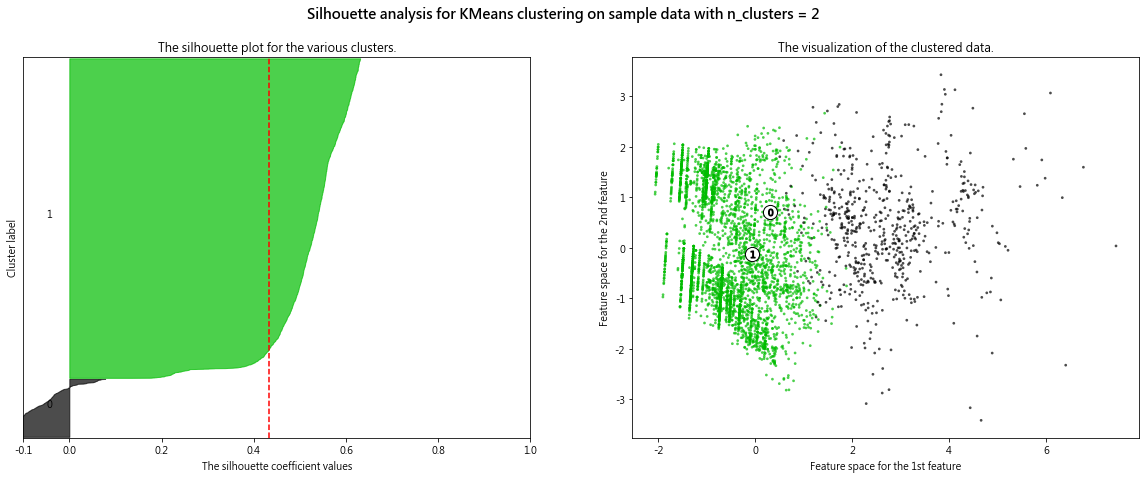

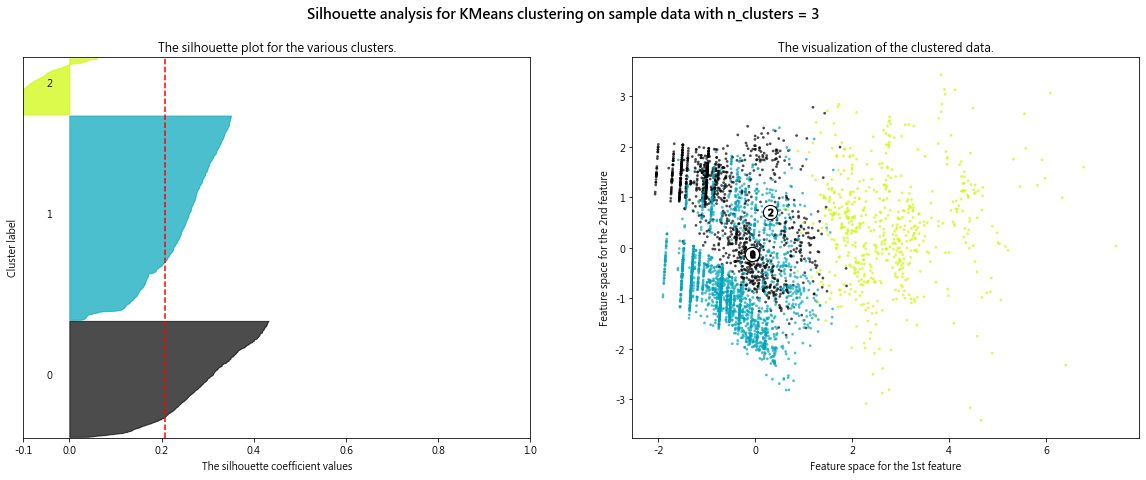

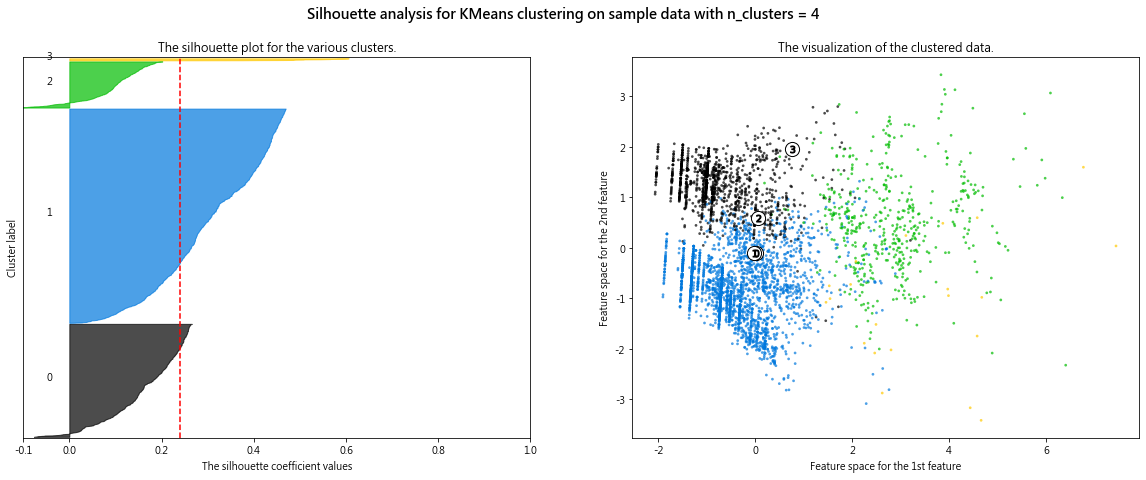

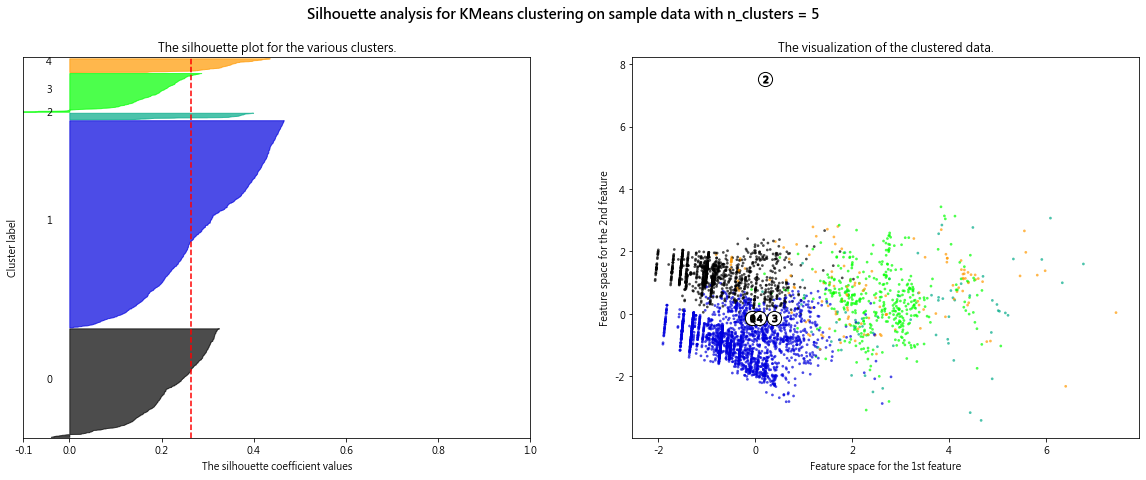

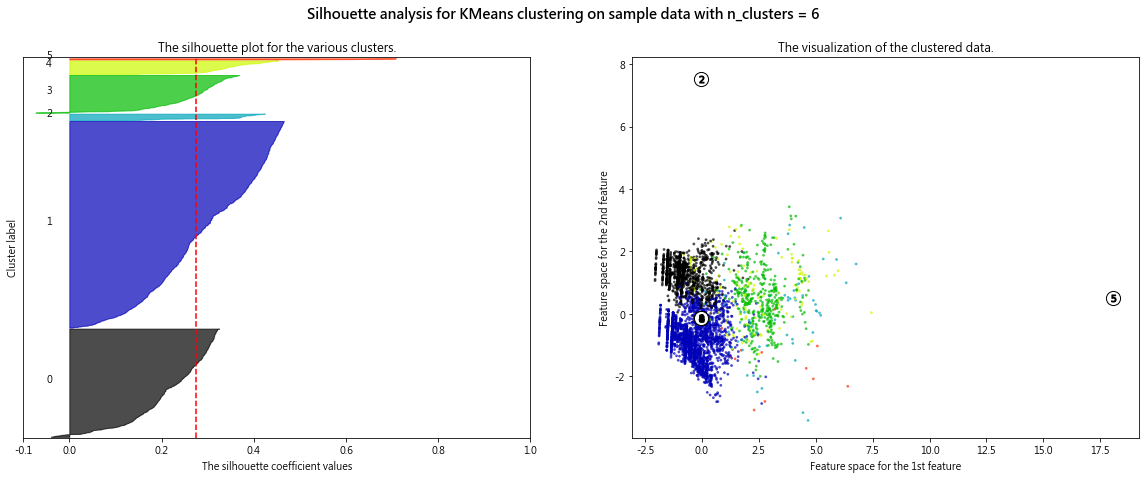

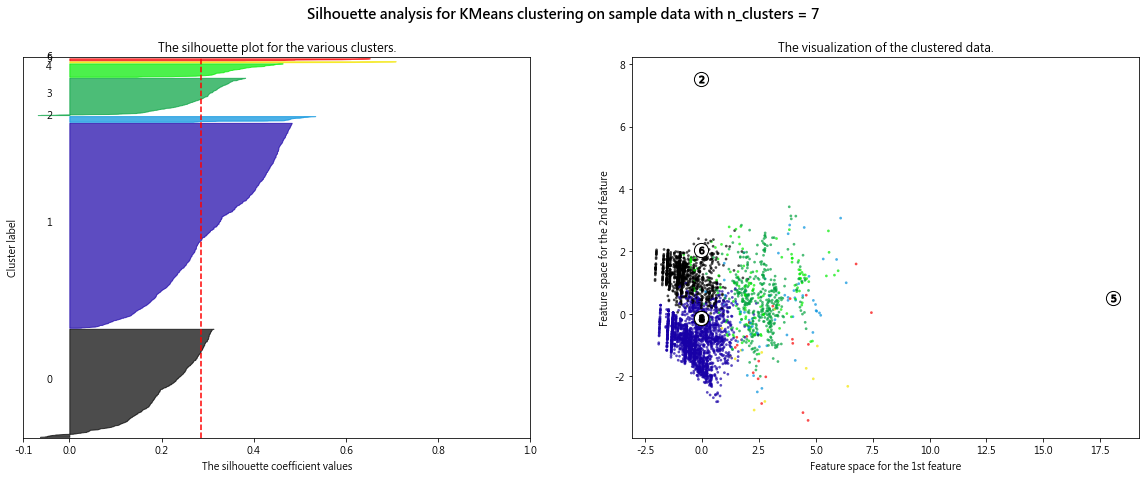

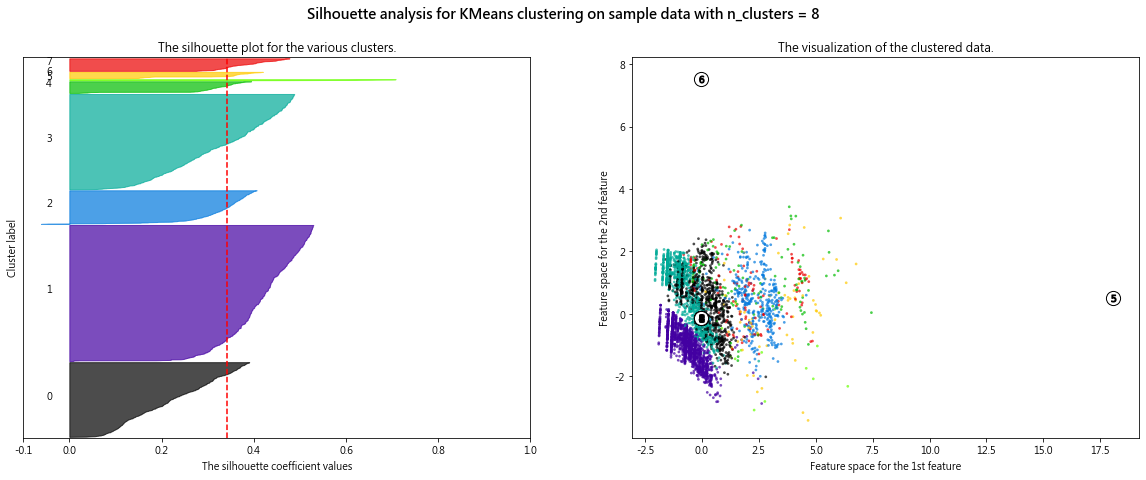

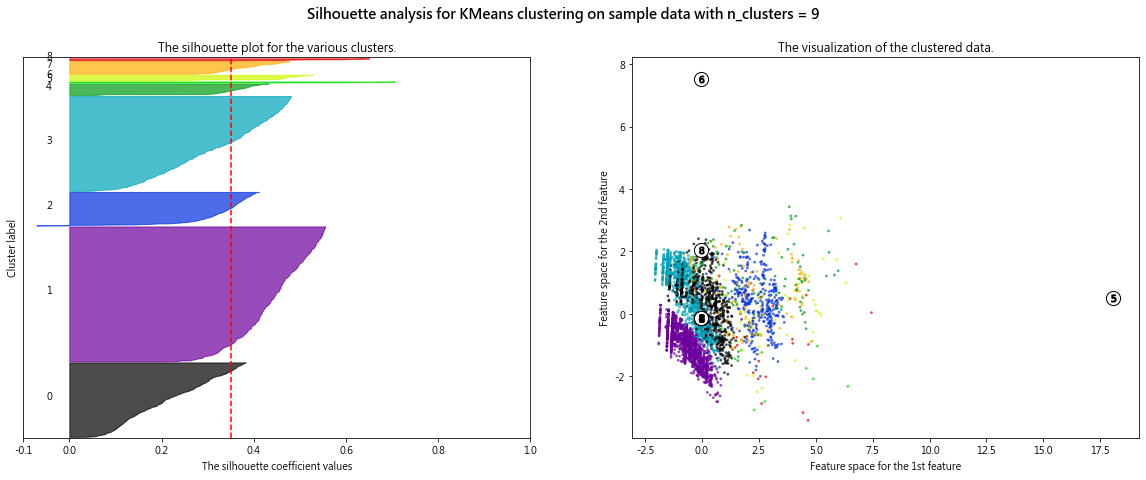

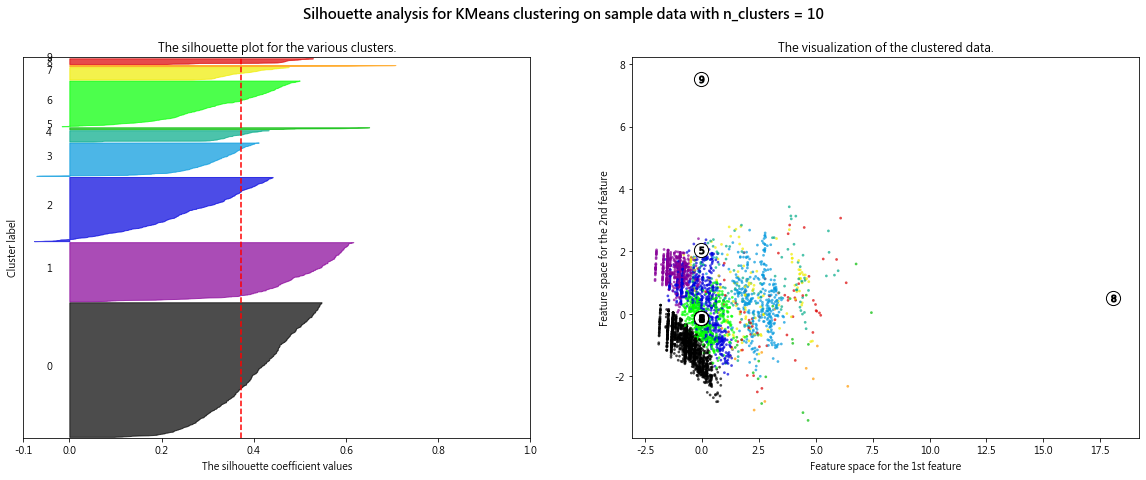

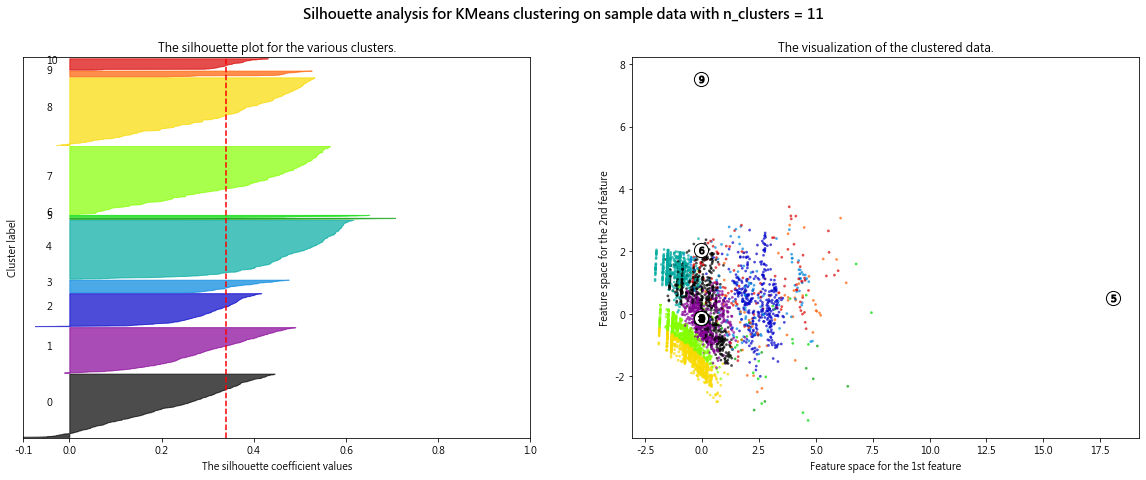

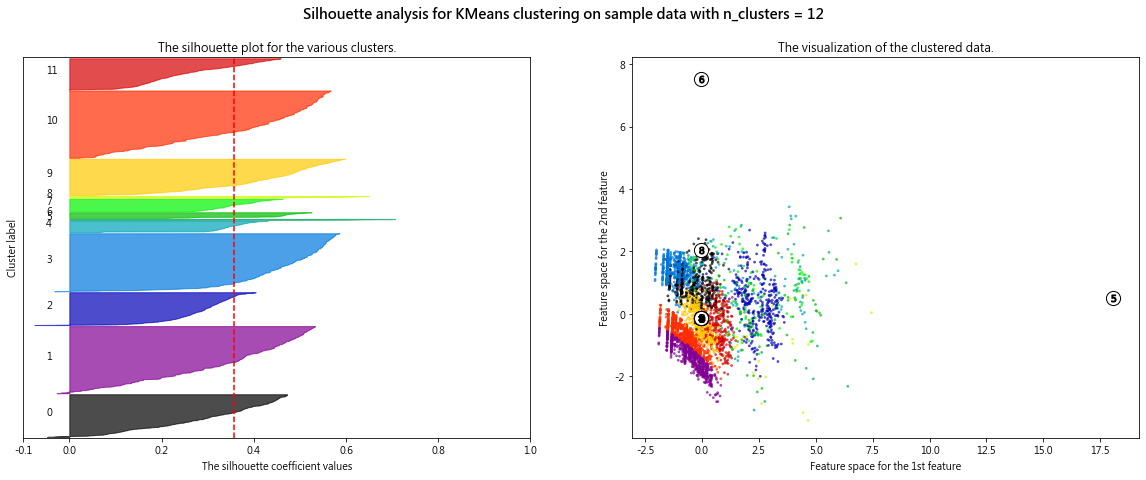

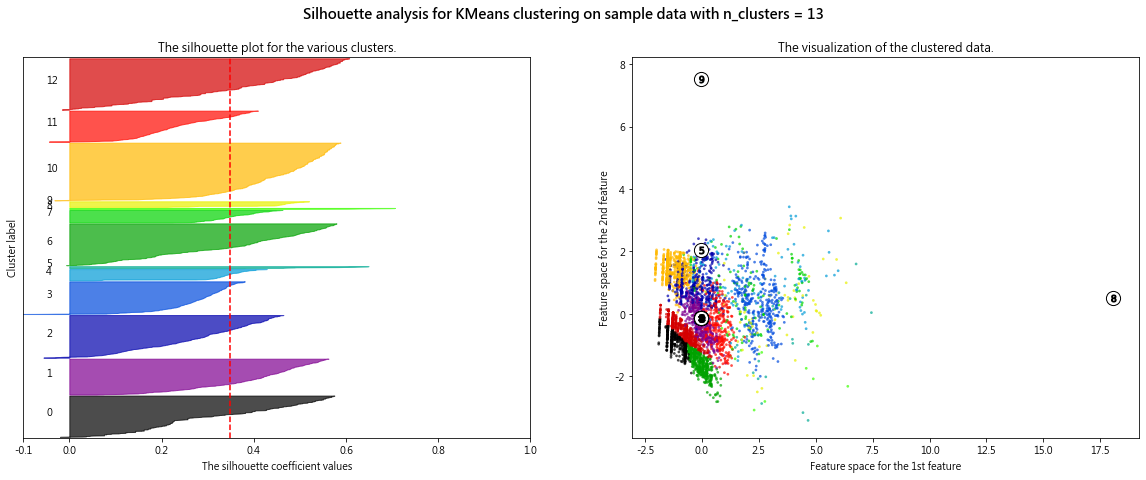

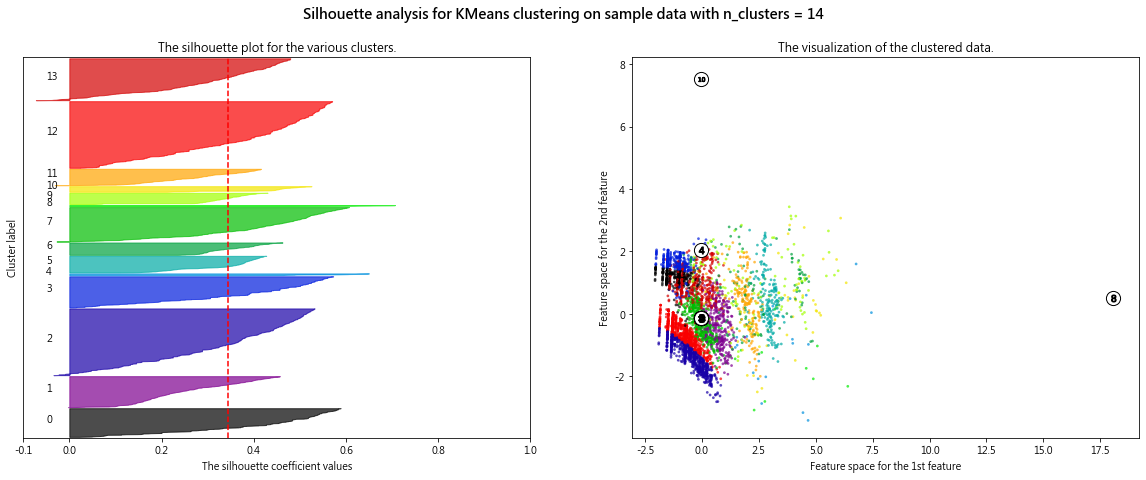

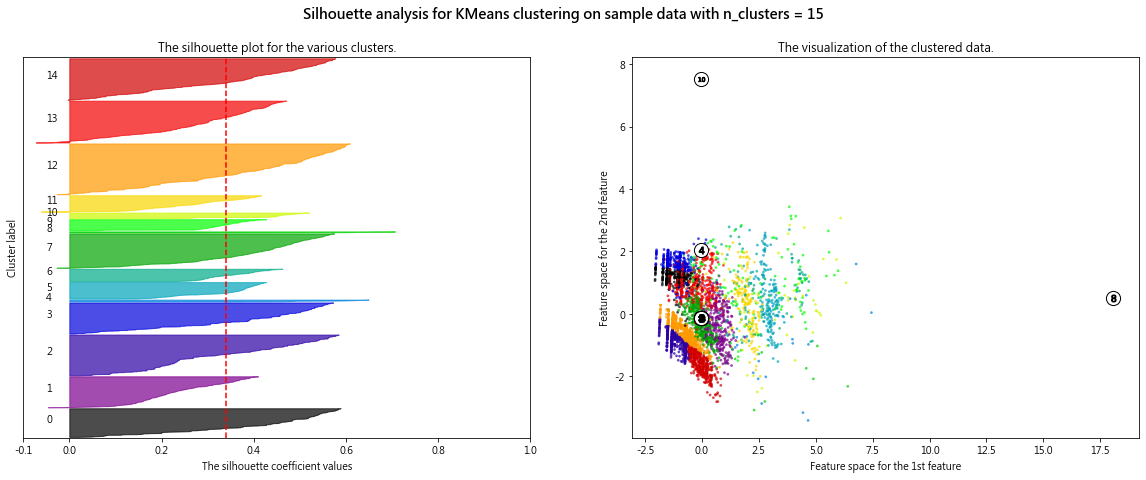

In [55]:
# silhouette_score plot
vs.Silhouette_score(r = 16, df = Wealth_scaled_features_df, reduced_df = reduced_data)
plt.savefig('Wealth_2019'+ '_Silhouette_score' + '.png')

In [92]:
## K mode
# Inverse transform the box-cox centers
true_centers = bc.inverse_transform(kproto_centers[0])
true_centers[np.isnan(true_centers)] = 1
df1 = pd.DataFrame(kproto_centers[1], columns = Wealth_scaledfeat_w_prop_df.iloc[:,[11, 12, 13, 14, 15]].keys())
df2 = pd.DataFrame(np.round(true_centers), columns = Wealth_scaled_features_df.iloc[:,:11].keys())

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(kmeans_centers))]
true_centers_true = df1.merge(df2, left_index = True, right_index = True)
true_centers_true.index = segments
display(true_centers_true)

# Segment mean
Wealth_flat['Label'] = kproto.labels_
display(round(Wealth_flat.groupby('Label').mean()))

Product_Variable Age_bins  Gender Constellation Com_ID Sales_ID  債券附條件交易  \
Segment 0           50-59  FEMALE           天蠍座   5856     5856      1.0   
Segment 1           50-59  FEMALE           水瓶座   5850     5850      1.0   

Product_Variable  國內投信基金_RR1  國內投信基金_RR2  國內投信基金_RR3  國內投信基金_RR4  國內投信基金_RR5  \
Segment 0                1.0         1.0         3.0      4066.0         9.0   
Segment 1                1.0         1.0        19.0      6833.0        14.0   

Product_Variable  國內結構型商品  境外基金集保  外國債券  Buy_Amount   Age  
Segment 0             1.0     1.0   1.0     45028.0  54.0  
Segment 1             1.0    12.0   1.0   2622381.0  53.0

Product_Variable  債券附條件交易  國內投信基金_RR1  國內投信基金_RR2  國內投信基金_RR3  國內投信基金_RR4  \
Label                                                                       
0                     1.0         4.0       111.0     44999.0    111449.0   
1                 36331.0    457185.0     99202.0    182278.0    244695.0   

Product_Variable  國內投信基金_RR5   國內結構型商品     境外基金集保    外國債券  Buy_Amount   Age  
Label                                                                        
0                    28168.0       1.0       21.0  1103.0    185850.0  55.0  
1                    64346.0  516332.0  6581609.0  6393.0   8188365.0  54.0

In [93]:
# Save Customer list 
Wealth_flat.loc[:,['Age', 'Gender', 'Label']].to_excel('Wealth_2019_Old_Customer_list.xlsx')

In [96]:
# ANOVA test(k mode)
import scipy.stats as ss
Wealth_flat_t = Wealth_flat.drop(['Gender','Age_bins'], axis = 1)
for Variable in Wealth_flat_t.keys():
    samples = [val[1] for val in Wealth_flat_t.groupby('Label')[Variable]]
    f_val, p_val = ss.f_oneway(*samples)
    print('Variable: {}, F value: {:.3f}, p value: {:.3f}'.format(Variable, f_val, p_val))

Variable: 債券附條件交易, F value: 15.717, p value: 0.000
Variable: 國內投信基金_RR1, F value: 45.745, p value: 0.000
Variable: 國內投信基金_RR2, F value: 108.283, p value: 0.000
Variable: 國內投信基金_RR3, F value: 103.514, p value: 0.000
Variable: 國內投信基金_RR4, F value: 62.616, p value: 0.000
Variable: 國內投信基金_RR5, F value: 8.041, p value: 0.005
Variable: 國內結構型商品, F value: 30.911, p value: 0.000
Variable: 境外基金集保, F value: 850.040, p value: 0.000
Variable: 外國債券, F value: 16.092, p value: 0.000
Variable: Buy_Amount, F value: 1029.492, p value: 0.000
Variable: Age, F value: 19.778, p value: 0.000
Variable: Label, F value: 7032739239043176448.000, p value: 0.000


In [97]:
# Chi-square for categorical var (k mode)
Wealth_scaledfeat_w_prop_df_chi = Wealth_scaledfeat_w_prop_df.iloc[:,-5:]
Wealth_scaledfeat_w_prop_df_chi['Label'] = kproto.labels_

for Variable in Wealth_scaledfeat_w_prop_df_chi.keys():
    samples = pd.crosstab(index = Wealth_scaledfeat_w_prop_df_chi['Label'], columns = Wealth_scaledfeat_w_prop_df_chi[Variable])
    chisq, p_val, df, ex = ss.chi2_contingency(samples, correction = False)
    print('Variable: {}, chi value: {:.3f}, p value: {:.3f}'.format(Variable, chisq, p_val))

Variable: Age_bins, chi value: 28.673, p value: 0.000
Variable: Gender, chi value: 0.034, p value: 0.854
Variable: Constellation, chi value: 8.079, p value: 0.706
Variable: Com_ID, chi value: 119.511, p value: 0.000
Variable: Sales_ID, chi value: 119.511, p value: 0.000
Variable: Label, chi value: 3924.000, p value: 0.000


In [98]:
# Paired T test 
writer = pd.ExcelWriter('Wealth_2019_Young_Turkey_HSD_sheets.xlsx', engine='xlsxwriter')
filter_ = Wealth_flat_t['Label'] == 0

for Variable in Wealth_flat_t.keys():
    t_val, p_val = ss.ttest_ind(Wealth_flat_t[filter_][Variable], Wealth_flat_t[~filter_][Variable])
    print('Variable: {}, t value: {:.3f}, p value: {:.3f}'.format(Variable, t_val, p_val))

Variable: 債券附條件交易, t value: -3.964, p value: 0.000
Variable: 國內投信基金_RR1, t value: -6.763, p value: 0.000
Variable: 國內投信基金_RR2, t value: -10.406, p value: 0.000
Variable: 國內投信基金_RR3, t value: -10.174, p value: 0.000
Variable: 國內投信基金_RR4, t value: -7.913, p value: 0.000
Variable: 國內投信基金_RR5, t value: -2.836, p value: 0.005
Variable: 國內結構型商品, t value: -5.560, p value: 0.000
Variable: 境外基金集保, t value: -29.155, p value: 0.000
Variable: 外國債券, t value: -4.011, p value: 0.000
Variable: Buy_Amount, t value: -32.086, p value: 0.000
Variable: Age, t value: 4.447, p value: 0.000
Variable: Label, t value: -inf, p value: 0.000
